In [1]:
## EDIT:
base_dir = '/glade/work/kjmayer/research/catalyst/TransferLearning/runmean_analysis/artificial_bias/perfectmodel_TLtest/E3SM_analysis/'

In [2]:
import xarray as xr
import numpy as np
# import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import datetime as dt
import random
import pandas as pd
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
from tensorflow import keras
from tensorflow.keras import layers
import time

import sys
sys.path.append(base_dir+'functions/')
from utils import split_SDbias, plot_results
from exp_hp import get_hp

2024-08-07 16:08:51.272876: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-07 16:08:51.353333: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


Num GPUs Available:  0


### Fuctions

In [3]:
def create_ann(input_shape, n_output, hiddens, RIDGE = 0, dropout = True, dropout_rate = 0.0):
    tf.keras.backend.clear_session() 

    # ----- input of cnn -----
    ann_input = keras.Input(shape = input_shape)

    for l,layer in enumerate(hiddens):
        # ----- ann layers -----
        if l == 0:
            x = tf.keras.layers.Dense(layer, 
                                      activation = 'relu',
                                      use_bias = True, 
                                      kernel_regularizer = tf.keras.regularizers.l1_l2(l1=0.0, l2=RIDGE),
                                      bias_initializer = tf.keras.initializers.RandomNormal(seed=SEED),
                                      kernel_initializer = tf.keras.initializers.RandomNormal(seed=SEED)
                                      )(ann_input)
            if dropout:
                x = layers.Dropout(rate = dropout_rate)(x)
        else:
            x = tf.keras.layers.Dense(layer, 
                                      activation = 'relu',
                                      use_bias = True, 
                                      kernel_regularizer = tf.keras.regularizers.l1_l2(l1=0.0, l2=0.0),
                                      bias_initializer = tf.keras.initializers.RandomNormal(seed=SEED),
                                      kernel_initializer = tf.keras.initializers.RandomNormal(seed=SEED)
                                      )(x)
        
    # ----- output -----
    ann_output = tf.keras.layers.Dense(n_output,
                                       activation = tf.keras.activations.softmax,
                                       use_bias = True,
                                       kernel_regularizer = tf.keras.regularizers.l1_l2(l1=0.0, l2=0.0),
                                       bias_initializer = tf.keras.initializers.RandomNormal(seed=SEED),
                                       kernel_initializer = tf.keras.initializers.RandomNormal(seed=SEED)
                                      )(x)
    # ----- create unet -----
    ann = keras.Model(ann_input, ann_output, name = 'ann')
    
    return ann

### Train NN

[128] 256 0.0001 0.0 0.9 30
Training Members: ['0111', '0121', '0131', '0141', '0151', '0161', '0171', '0181', '0191']
Validation Member: 0201
Testing Member: 0101
files do not exist - loading data & saving


2024-08-07 16:09:11.987549: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Elapsed time during fit = 0.77 minutes



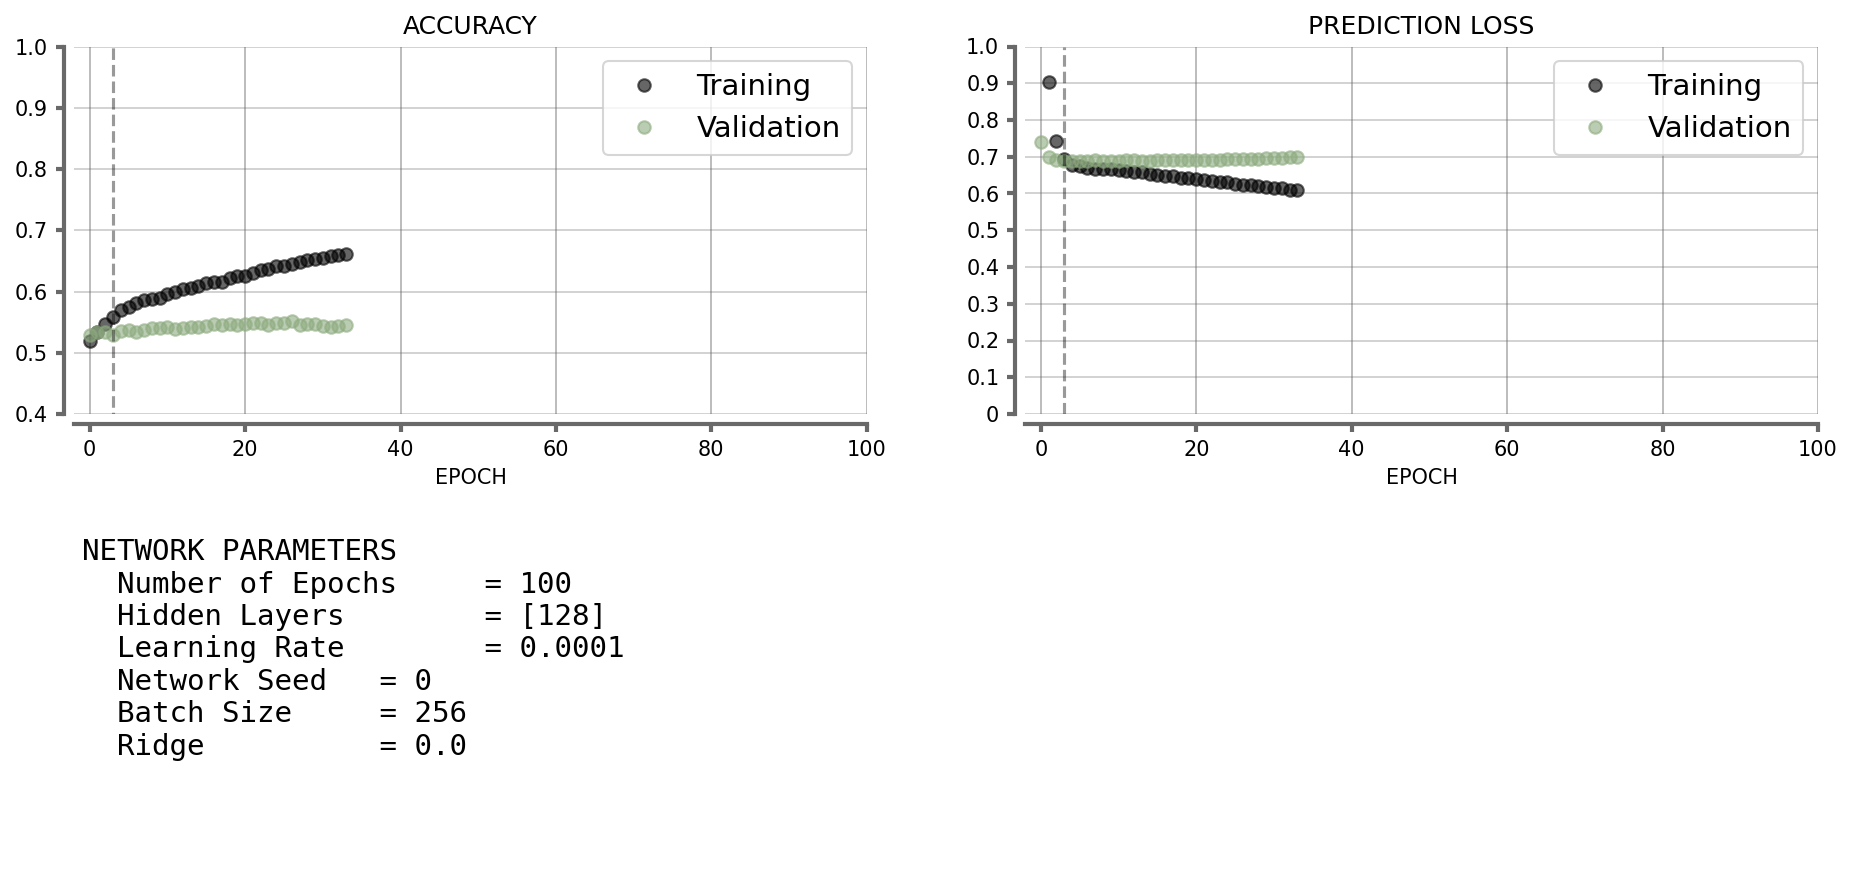

Elapsed time during fit = 0.77 minutes

Elapsed time during fit = 0.75 minutes

Elapsed time during fit = 0.89 minutes

Elapsed time during fit = 0.84 minutes

Elapsed time during fit = 1.08 minutes

Elapsed time during fit = 0.94 minutes

Elapsed time during fit = 0.80 minutes

Elapsed time during fit = 0.96 minutes

Elapsed time during fit = 0.78 minutes

Training Members: ['0121', '0131', '0141', '0151', '0161', '0171', '0181', '0191', '0201']
Validation Member: 0211
Testing Member: 0111
files do not exist - loading data & saving
Elapsed time during fit = 0.98 minutes



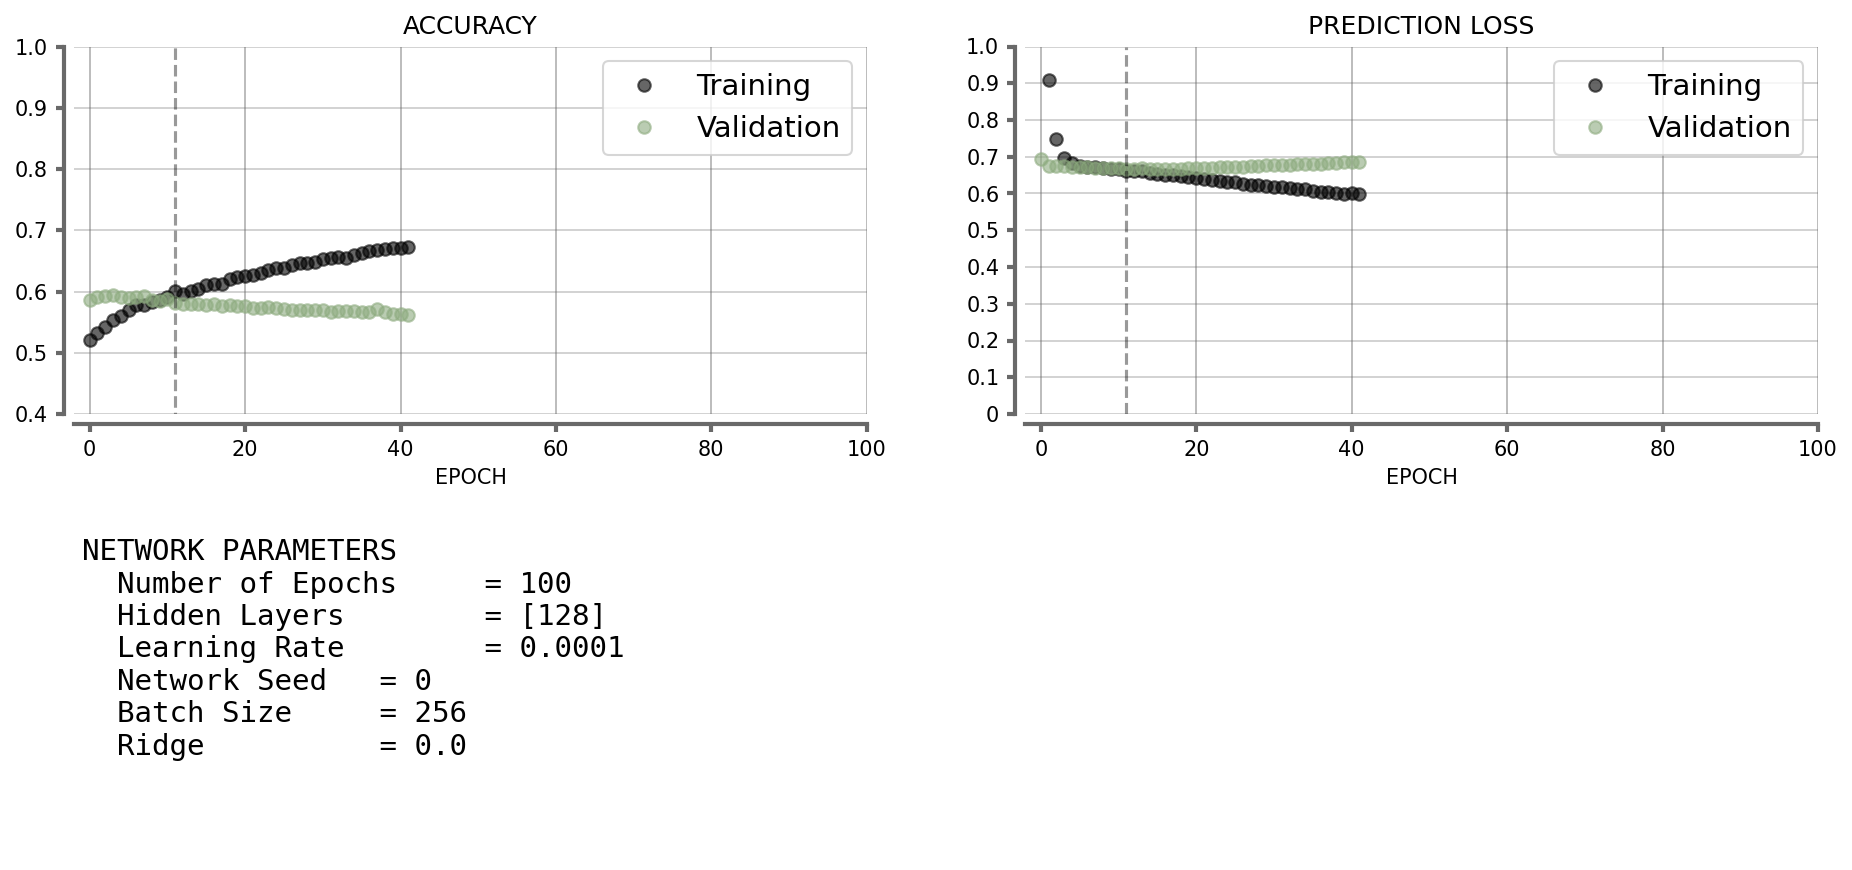

Elapsed time during fit = 0.94 minutes

Elapsed time during fit = 1.08 minutes

Elapsed time during fit = 1.00 minutes

Elapsed time during fit = 1.04 minutes

Elapsed time during fit = 0.88 minutes

Elapsed time during fit = 0.98 minutes

Elapsed time during fit = 0.91 minutes

Elapsed time during fit = 0.98 minutes

Elapsed time during fit = 0.88 minutes

Training Members: ['0131', '0141', '0151', '0161', '0171', '0181', '0191', '0201', '0211']
Validation Member: 0221
Testing Member: 0121
files do not exist - loading data & saving
Elapsed time during fit = 0.89 minutes



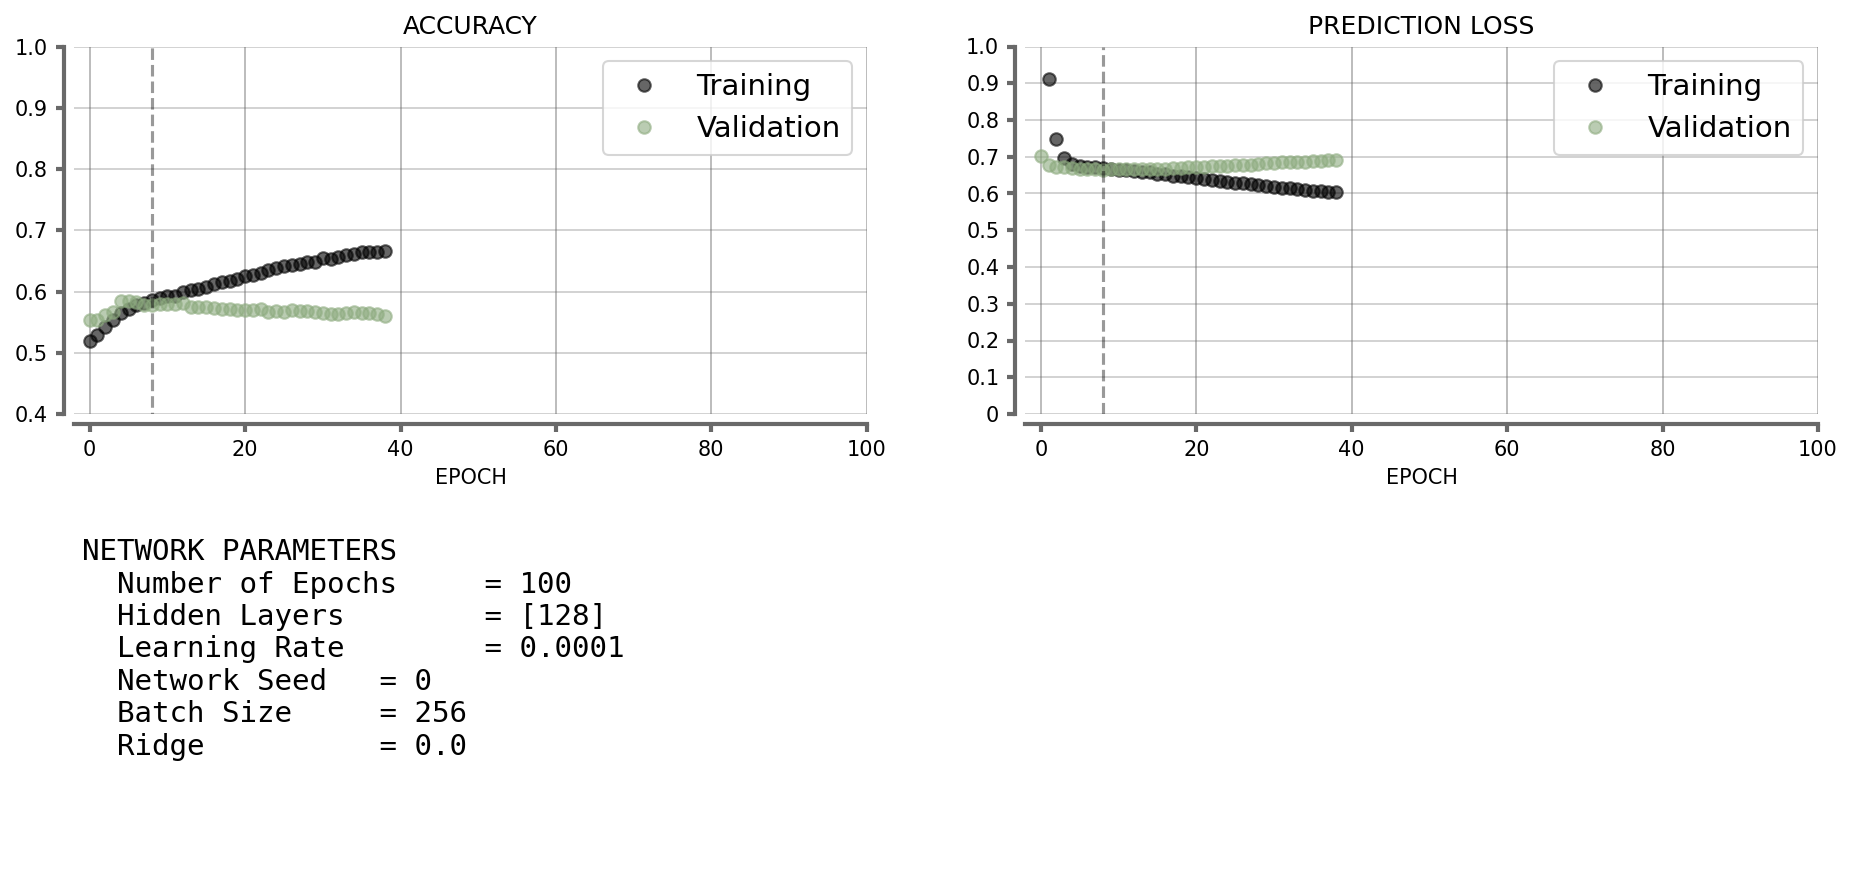

Elapsed time during fit = 0.89 minutes

Elapsed time during fit = 0.90 minutes

Elapsed time during fit = 0.85 minutes

Elapsed time during fit = 0.86 minutes

Elapsed time during fit = 0.90 minutes

Elapsed time during fit = 0.87 minutes

Elapsed time during fit = 0.89 minutes

Elapsed time during fit = 0.85 minutes

Elapsed time during fit = 0.87 minutes

Training Members: ['0141', '0151', '0161', '0171', '0181', '0191', '0201', '0211', '0221']
Validation Member: 0231
Testing Member: 0131
files do not exist - loading data & saving
Elapsed time during fit = 0.94 minutes



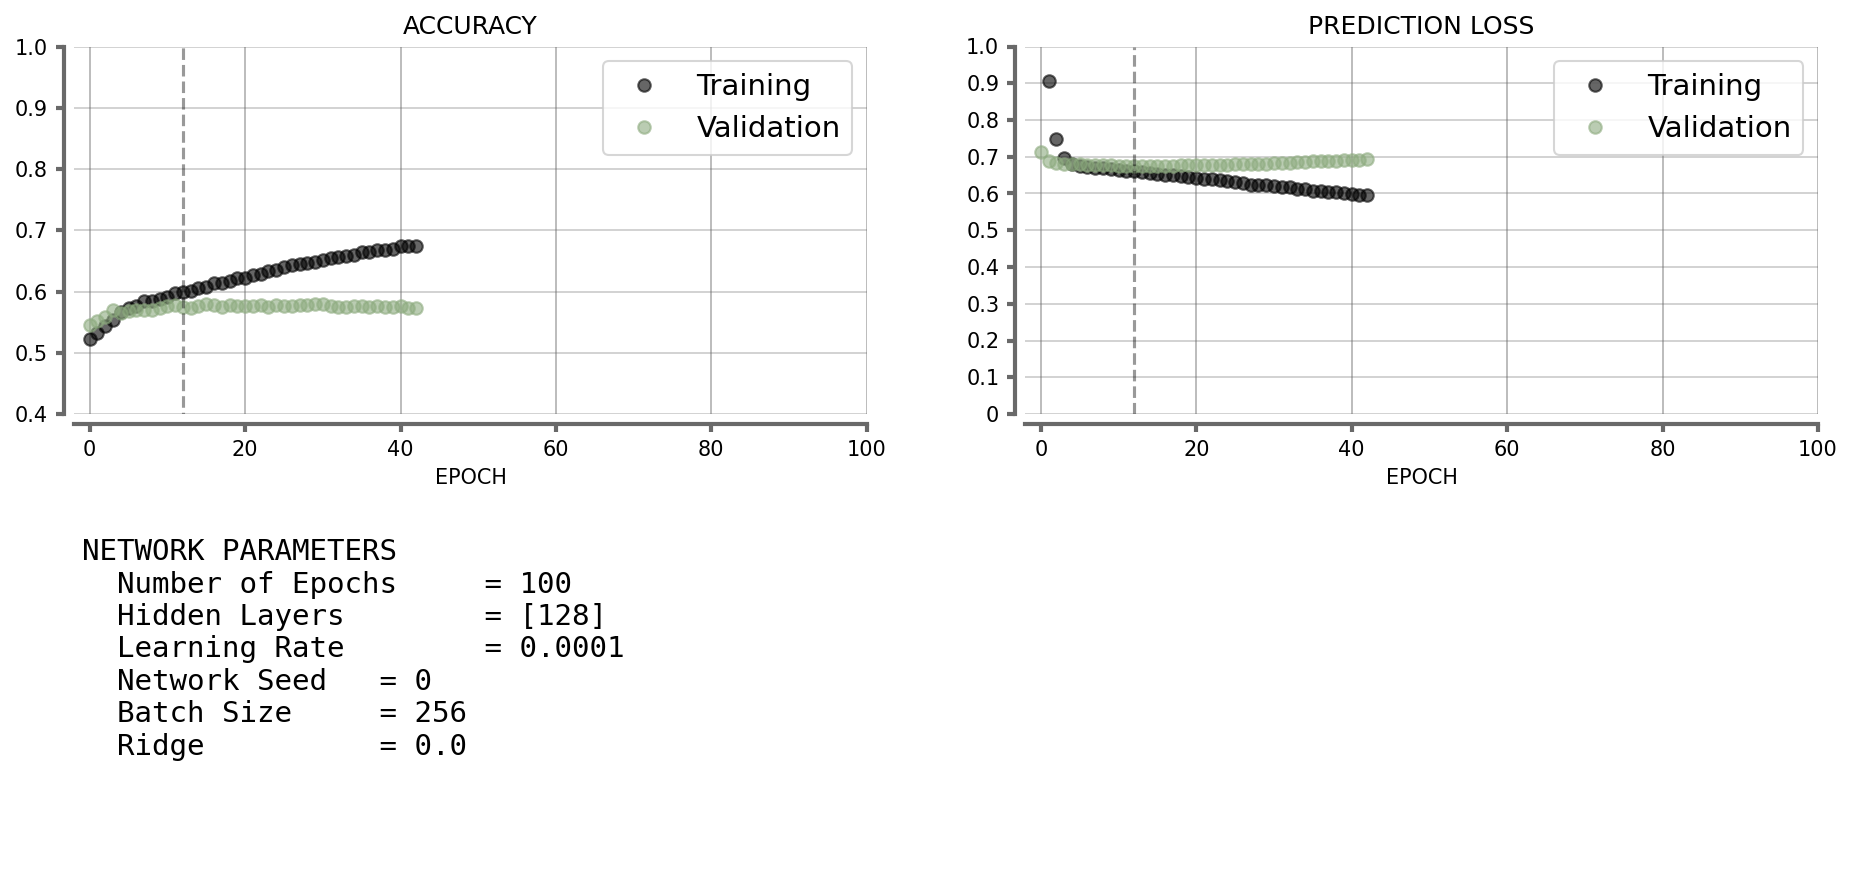

Elapsed time during fit = 0.93 minutes

Elapsed time during fit = 0.87 minutes

Elapsed time during fit = 0.92 minutes

Elapsed time during fit = 0.92 minutes

Elapsed time during fit = 0.95 minutes

Elapsed time during fit = 0.85 minutes

Elapsed time during fit = 0.86 minutes

Elapsed time during fit = 0.88 minutes

Elapsed time during fit = 0.88 minutes

Training Members: ['0151', '0161', '0171', '0181', '0191', '0201', '0211', '0221', '0231']
Validation Member: 0241
Testing Member: 0141
files do not exist - loading data & saving
Elapsed time during fit = 0.73 minutes



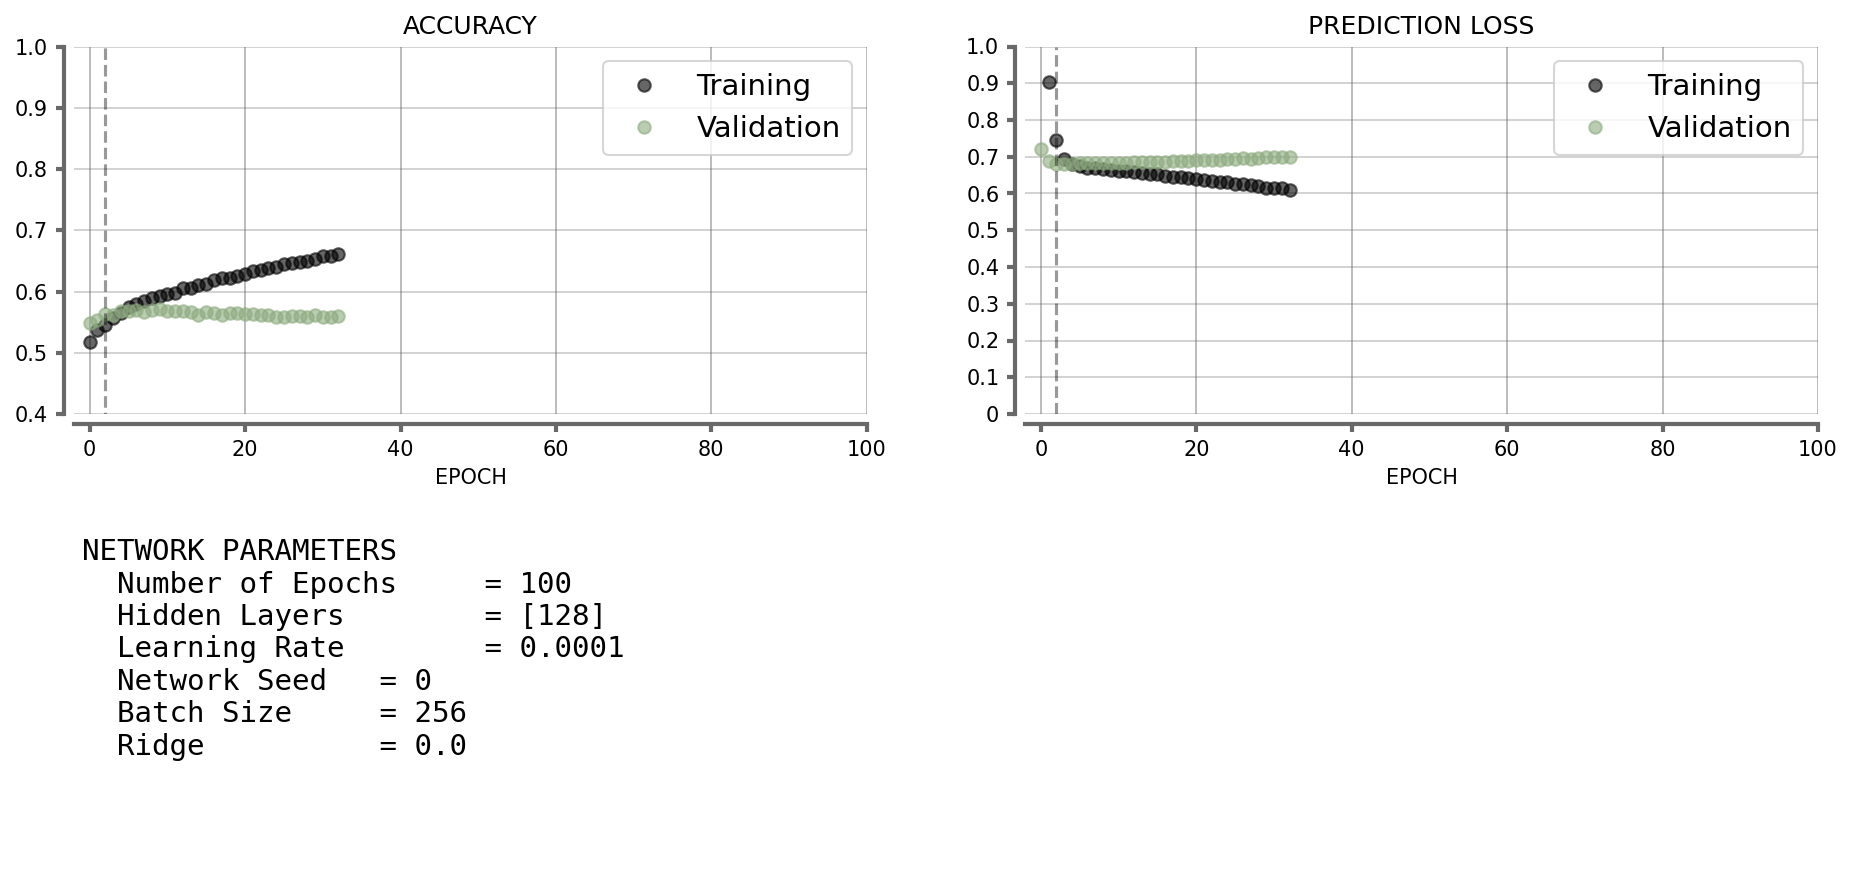

Elapsed time during fit = 0.79 minutes

Elapsed time during fit = 0.73 minutes

Elapsed time during fit = 0.77 minutes

Elapsed time during fit = 0.74 minutes

Elapsed time during fit = 0.78 minutes

Elapsed time during fit = 0.73 minutes

Elapsed time during fit = 0.74 minutes

Elapsed time during fit = 0.76 minutes

Elapsed time during fit = 0.71 minutes

Training Members: ['0161', '0171', '0181', '0191', '0201', '0211', '0221', '0231', '0241']
Validation Member: 0251
Testing Member: 0151
files do not exist - loading data & saving
Elapsed time during fit = 0.79 minutes



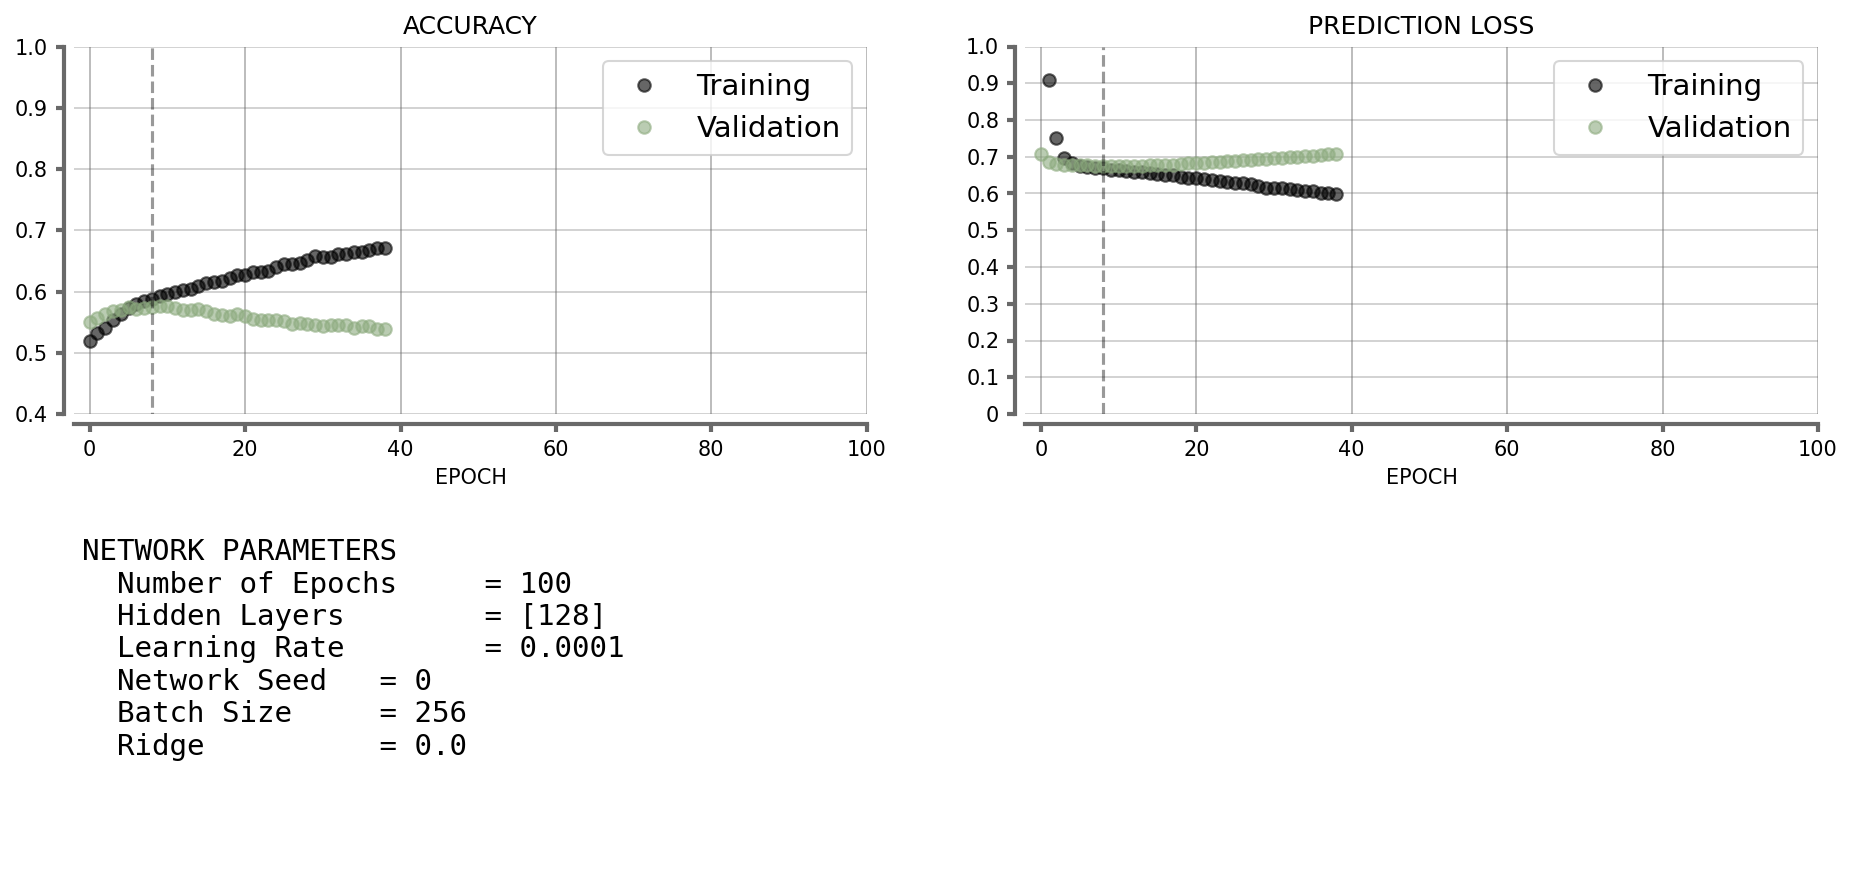

Elapsed time during fit = 0.77 minutes

Elapsed time during fit = 0.83 minutes

Elapsed time during fit = 0.80 minutes

Elapsed time during fit = 0.90 minutes

Elapsed time during fit = 0.89 minutes

Elapsed time during fit = 0.84 minutes

Elapsed time during fit = 0.89 minutes

Elapsed time during fit = 0.78 minutes

Elapsed time during fit = 0.79 minutes

Training Members: ['0171', '0181', '0191', '0201', '0211', '0221', '0231', '0241', '0251']
Validation Member: 0261
Testing Member: 0161
files do not exist - loading data & saving
Elapsed time during fit = 0.87 minutes



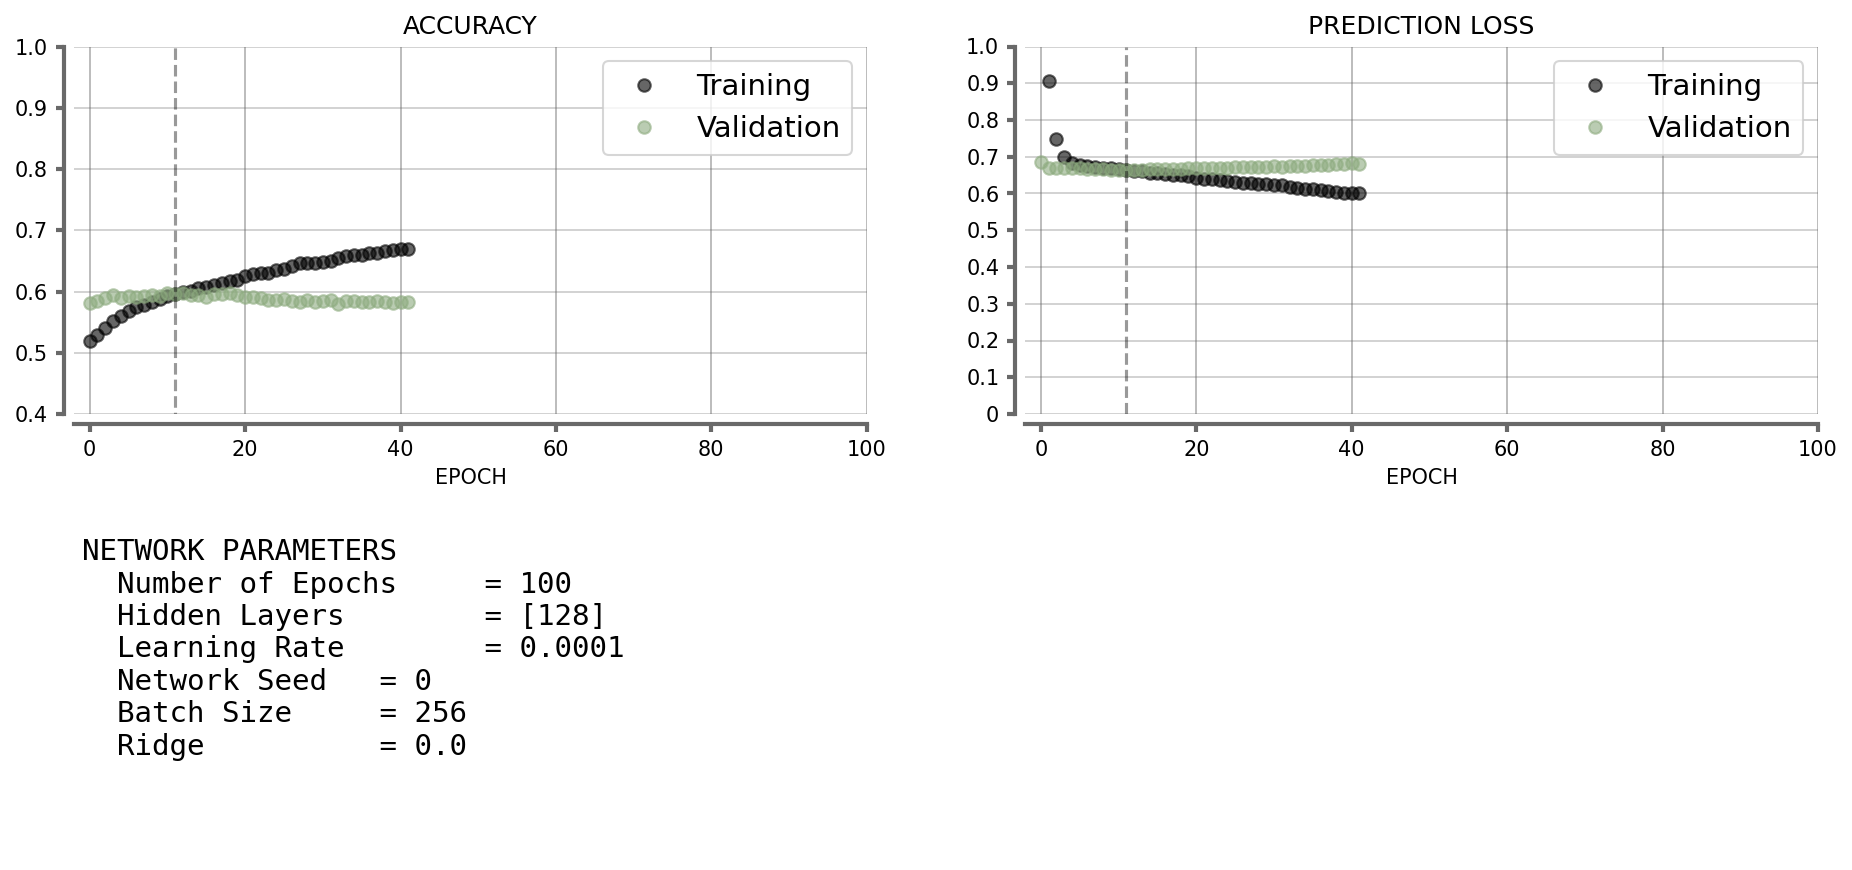

Elapsed time during fit = 0.86 minutes

Elapsed time during fit = 0.67 minutes

Elapsed time during fit = 0.88 minutes

Elapsed time during fit = 0.87 minutes

Elapsed time during fit = 0.77 minutes

Elapsed time during fit = 0.81 minutes

Elapsed time during fit = 0.81 minutes

Elapsed time during fit = 0.90 minutes

Elapsed time during fit = 0.93 minutes

Training Members: ['0181', '0191', '0201', '0211', '0221', '0231', '0241', '0251', '0261']
Validation Member: 0271
Testing Member: 0171
files do not exist - loading data & saving
Elapsed time during fit = 0.84 minutes



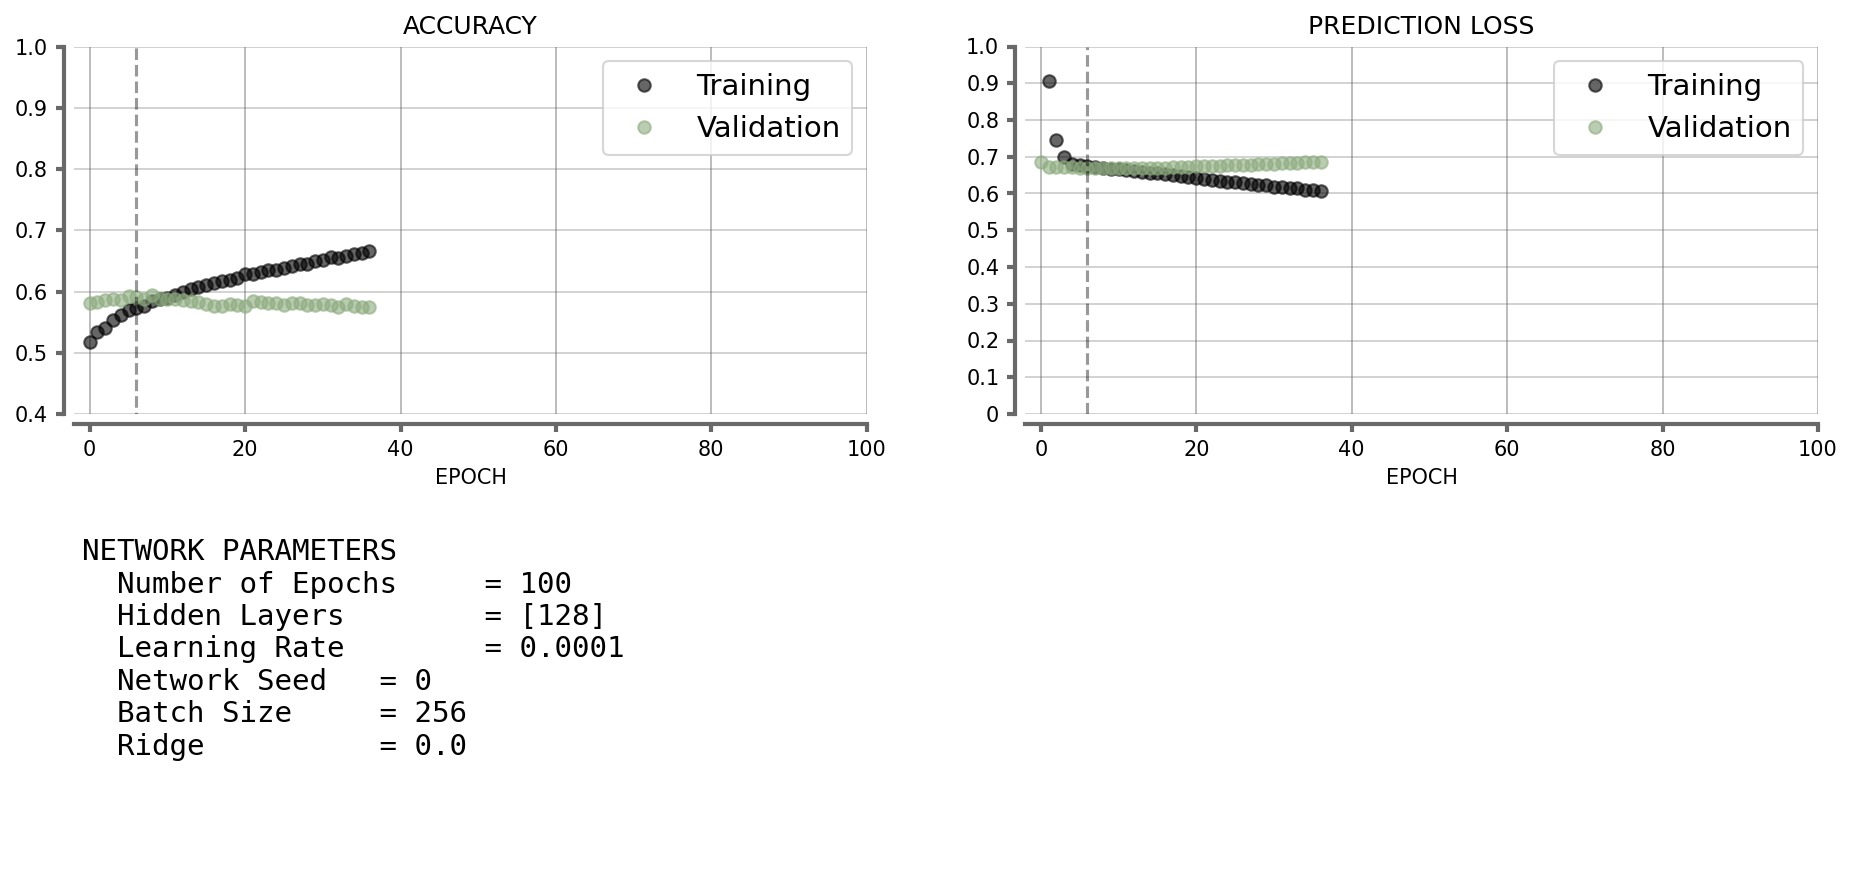

Elapsed time during fit = 1.03 minutes

Elapsed time during fit = 1.04 minutes

Elapsed time during fit = 0.95 minutes

Elapsed time during fit = 0.89 minutes

Elapsed time during fit = 0.83 minutes

Elapsed time during fit = 0.92 minutes

Elapsed time during fit = 0.89 minutes

Elapsed time during fit = 0.90 minutes

Elapsed time during fit = 0.90 minutes

Training Members: ['0191', '0201', '0211', '0221', '0231', '0241', '0251', '0261', '0271']
Validation Member: 0281
Testing Member: 0181
files do not exist - loading data & saving
Elapsed time during fit = 0.83 minutes



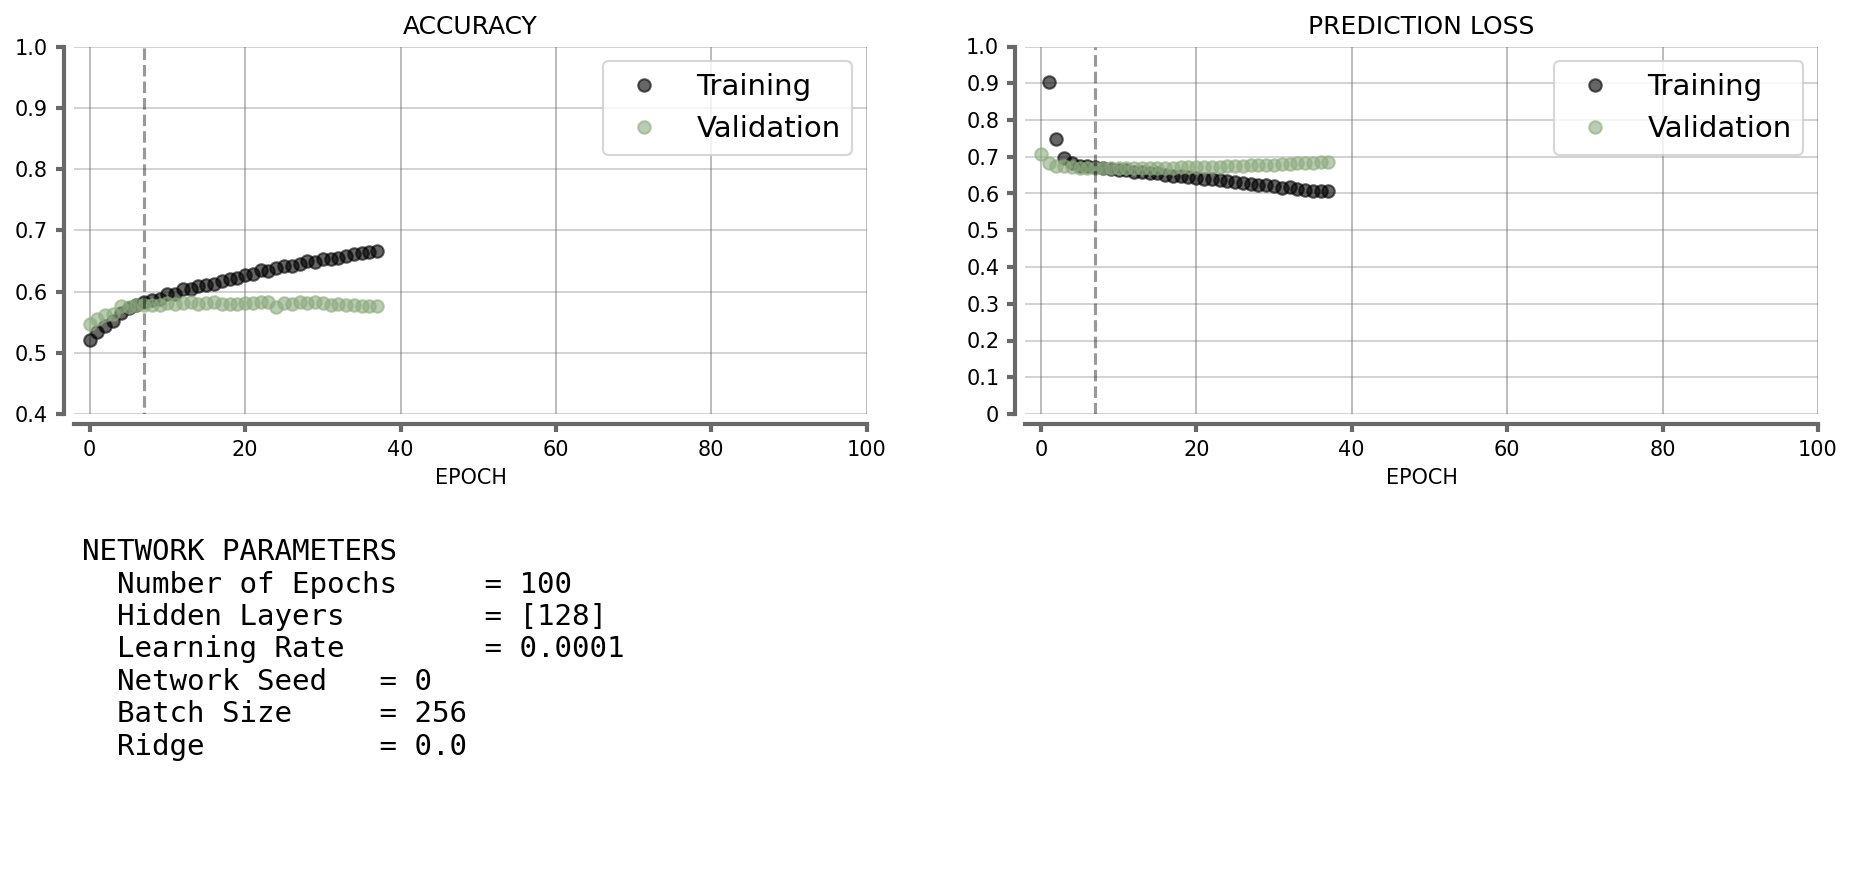

Elapsed time during fit = 0.95 minutes

Elapsed time during fit = 0.84 minutes

Elapsed time during fit = 0.83 minutes

Elapsed time during fit = 0.90 minutes

Elapsed time during fit = 0.81 minutes

Elapsed time during fit = 0.88 minutes

Elapsed time during fit = 0.92 minutes

Elapsed time during fit = 1.00 minutes

Elapsed time during fit = 0.85 minutes

Training Members: ['0201', '0211', '0221', '0231', '0241', '0251', '0261', '0271', '0281']
Validation Member: 0291
Testing Member: 0191
files do not exist - loading data & saving
Elapsed time during fit = 0.86 minutes



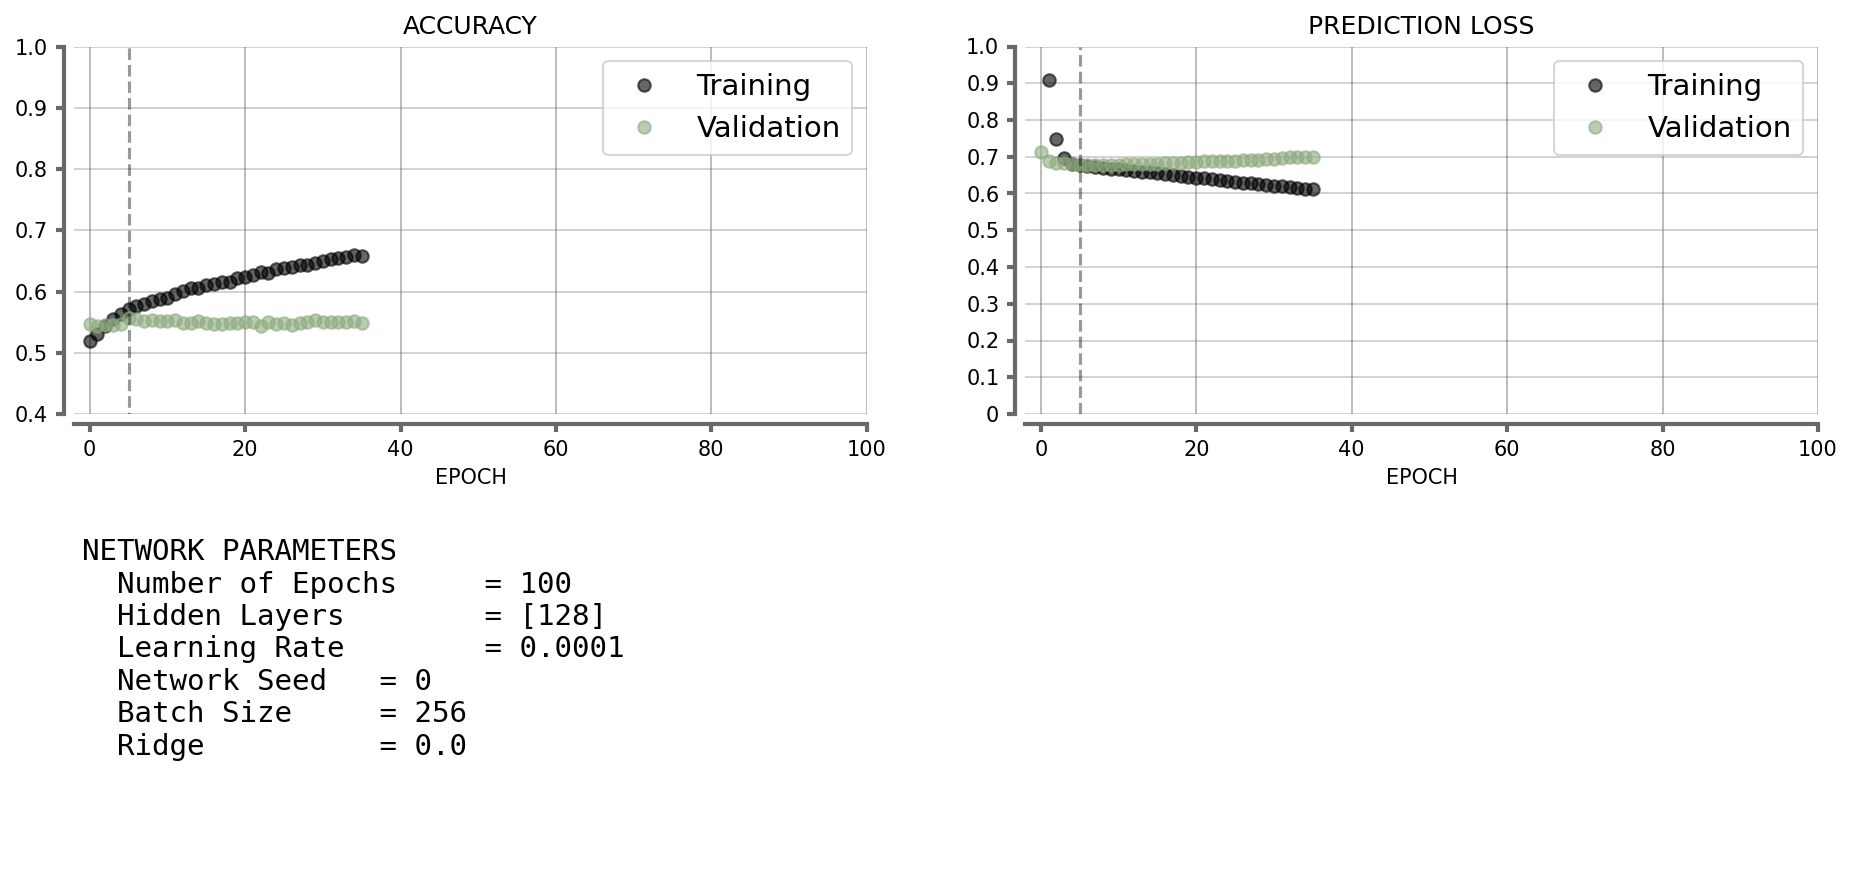

Elapsed time during fit = 0.95 minutes

Elapsed time during fit = 0.97 minutes

Elapsed time during fit = 0.90 minutes

Elapsed time during fit = 0.81 minutes

Elapsed time during fit = 0.81 minutes

Elapsed time during fit = 0.87 minutes

Elapsed time during fit = 0.82 minutes

Elapsed time during fit = 0.75 minutes

Elapsed time during fit = 0.83 minutes

Training Members: ['0211', '0221', '0231', '0241', '0251', '0261', '0271', '0281', '0291']
Validation Member: 0301
Testing Member: 0201
files do not exist - loading data & saving
Elapsed time during fit = 0.97 minutes



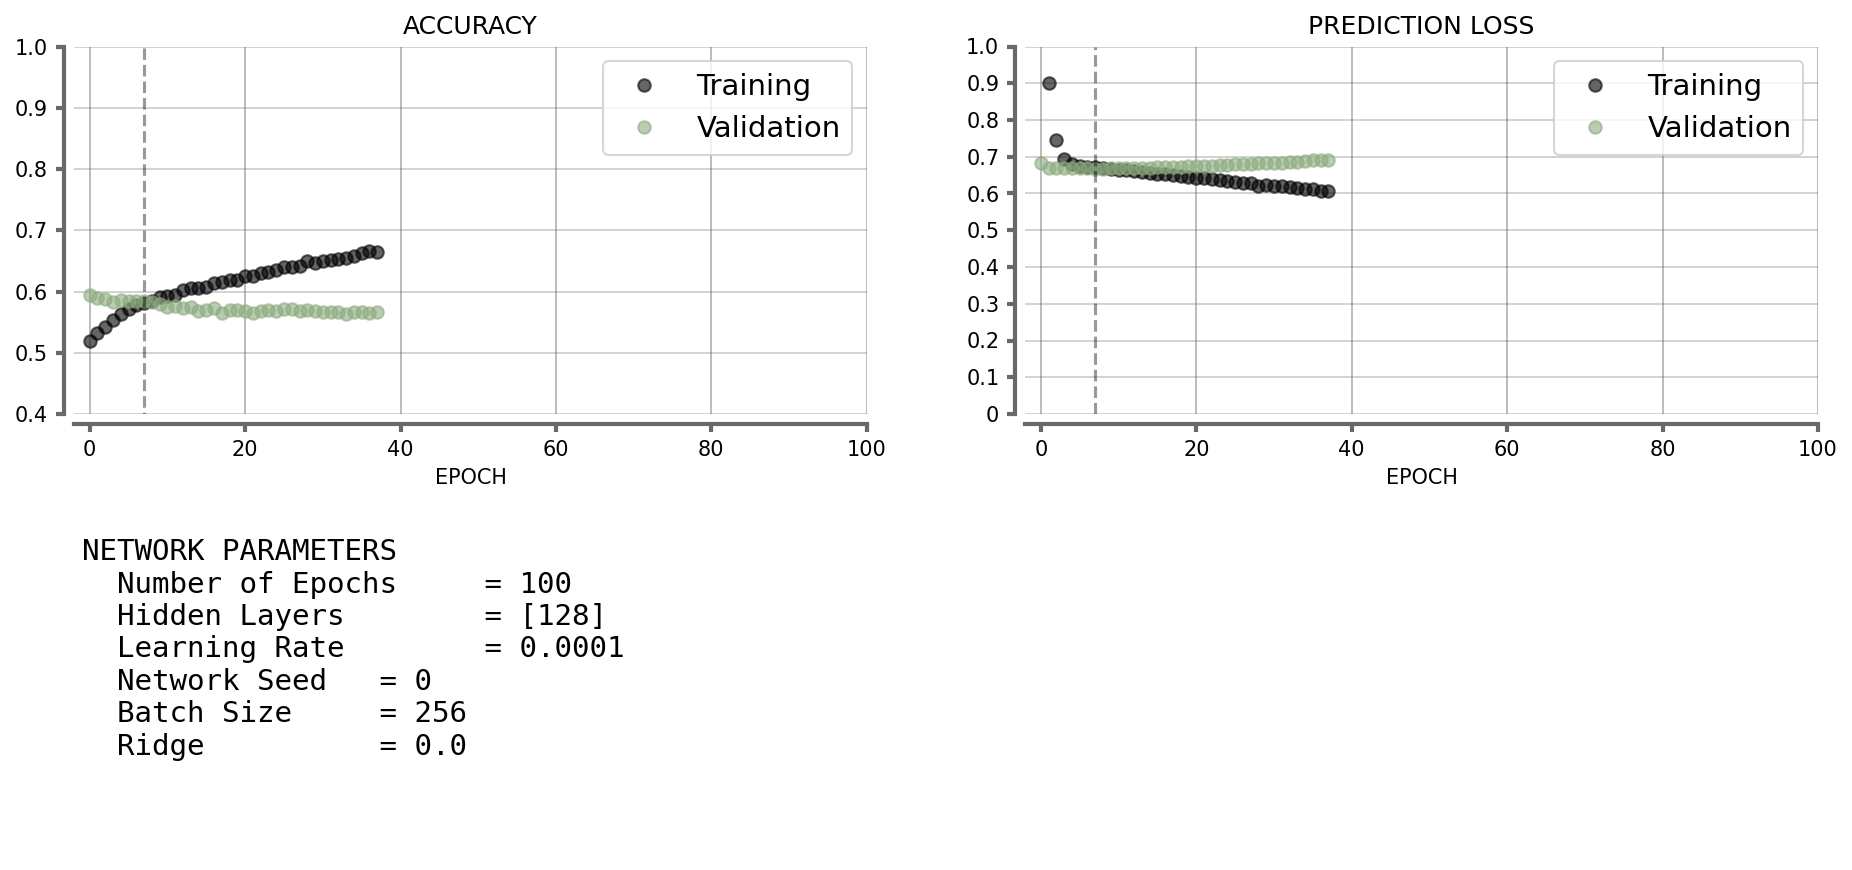

Elapsed time during fit = 0.94 minutes

Elapsed time during fit = 0.81 minutes

Elapsed time during fit = 0.85 minutes

Elapsed time during fit = 0.77 minutes

Elapsed time during fit = 0.84 minutes

Elapsed time during fit = 0.80 minutes

Elapsed time during fit = 0.83 minutes

Elapsed time during fit = 0.95 minutes

Elapsed time during fit = 0.82 minutes

Training Members: ['0221', '0231', '0241', '0251', '0261', '0271', '0281', '0291', '0301']
Validation Member: 0101
Testing Member: 0211
files do not exist - loading data & saving
Elapsed time during fit = 0.83 minutes



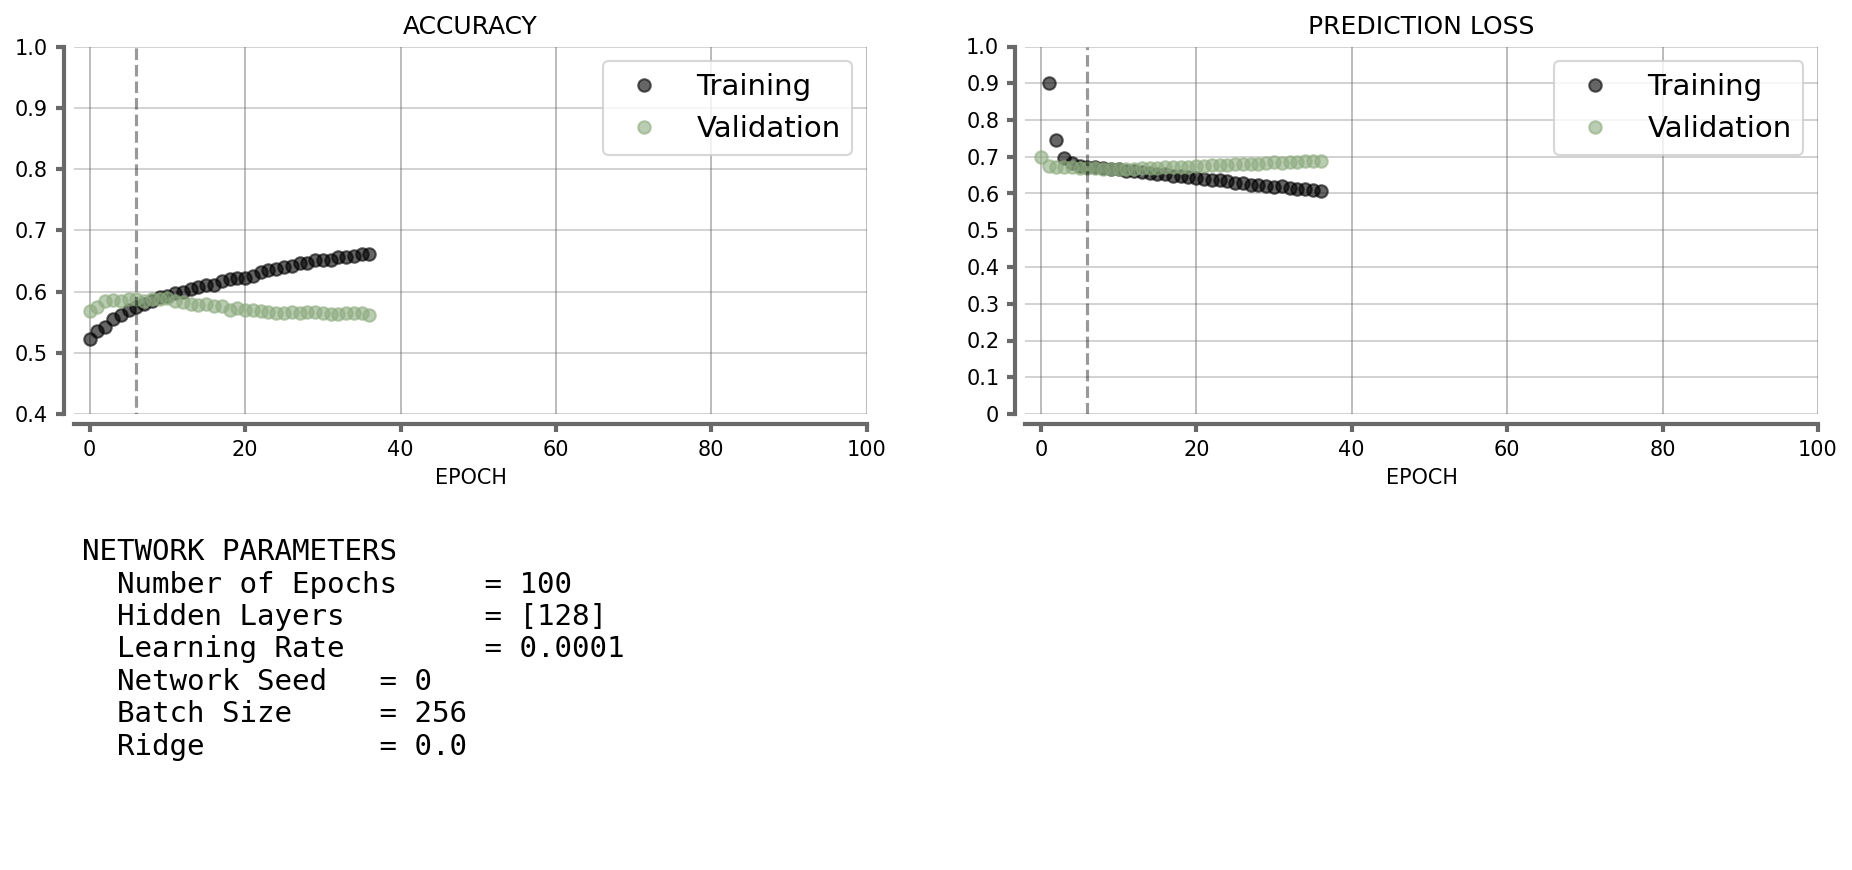

Elapsed time during fit = 0.87 minutes

Elapsed time during fit = 0.97 minutes

Elapsed time during fit = 0.95 minutes

Elapsed time during fit = 0.83 minutes

Elapsed time during fit = 0.92 minutes

Elapsed time during fit = 1.03 minutes

Elapsed time during fit = 0.90 minutes

Elapsed time during fit = 0.84 minutes

Elapsed time during fit = 0.83 minutes

Training Members: ['0231', '0241', '0251', '0261', '0271', '0281', '0291', '0301', '0101']
Validation Member: 0111
Testing Member: 0221
files do not exist - loading data & saving
Elapsed time during fit = 1.24 minutes



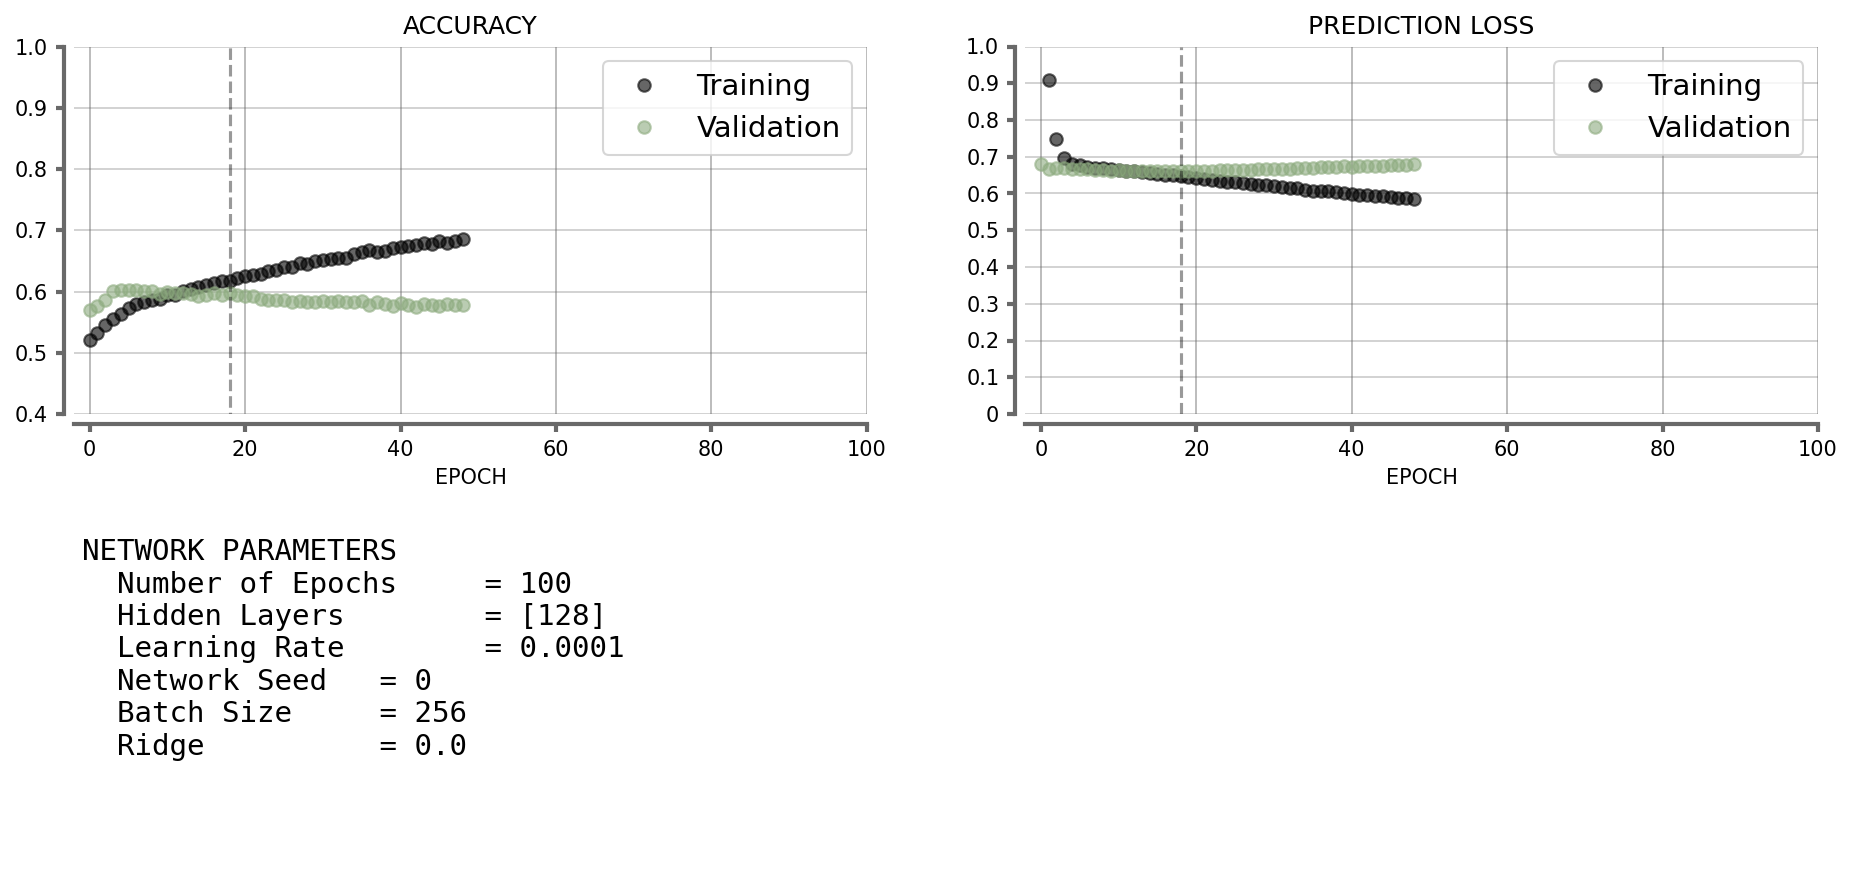

Elapsed time during fit = 1.07 minutes

Elapsed time during fit = 1.04 minutes

Elapsed time during fit = 0.93 minutes

Elapsed time during fit = 1.12 minutes

Elapsed time during fit = 0.99 minutes

Elapsed time during fit = 1.03 minutes

Elapsed time during fit = 1.10 minutes

Elapsed time during fit = 1.02 minutes

Elapsed time during fit = 1.05 minutes

Training Members: ['0241', '0251', '0261', '0271', '0281', '0291', '0301', '0101', '0111']
Validation Member: 0121
Testing Member: 0231
files do not exist - loading data & saving
Elapsed time during fit = 0.93 minutes



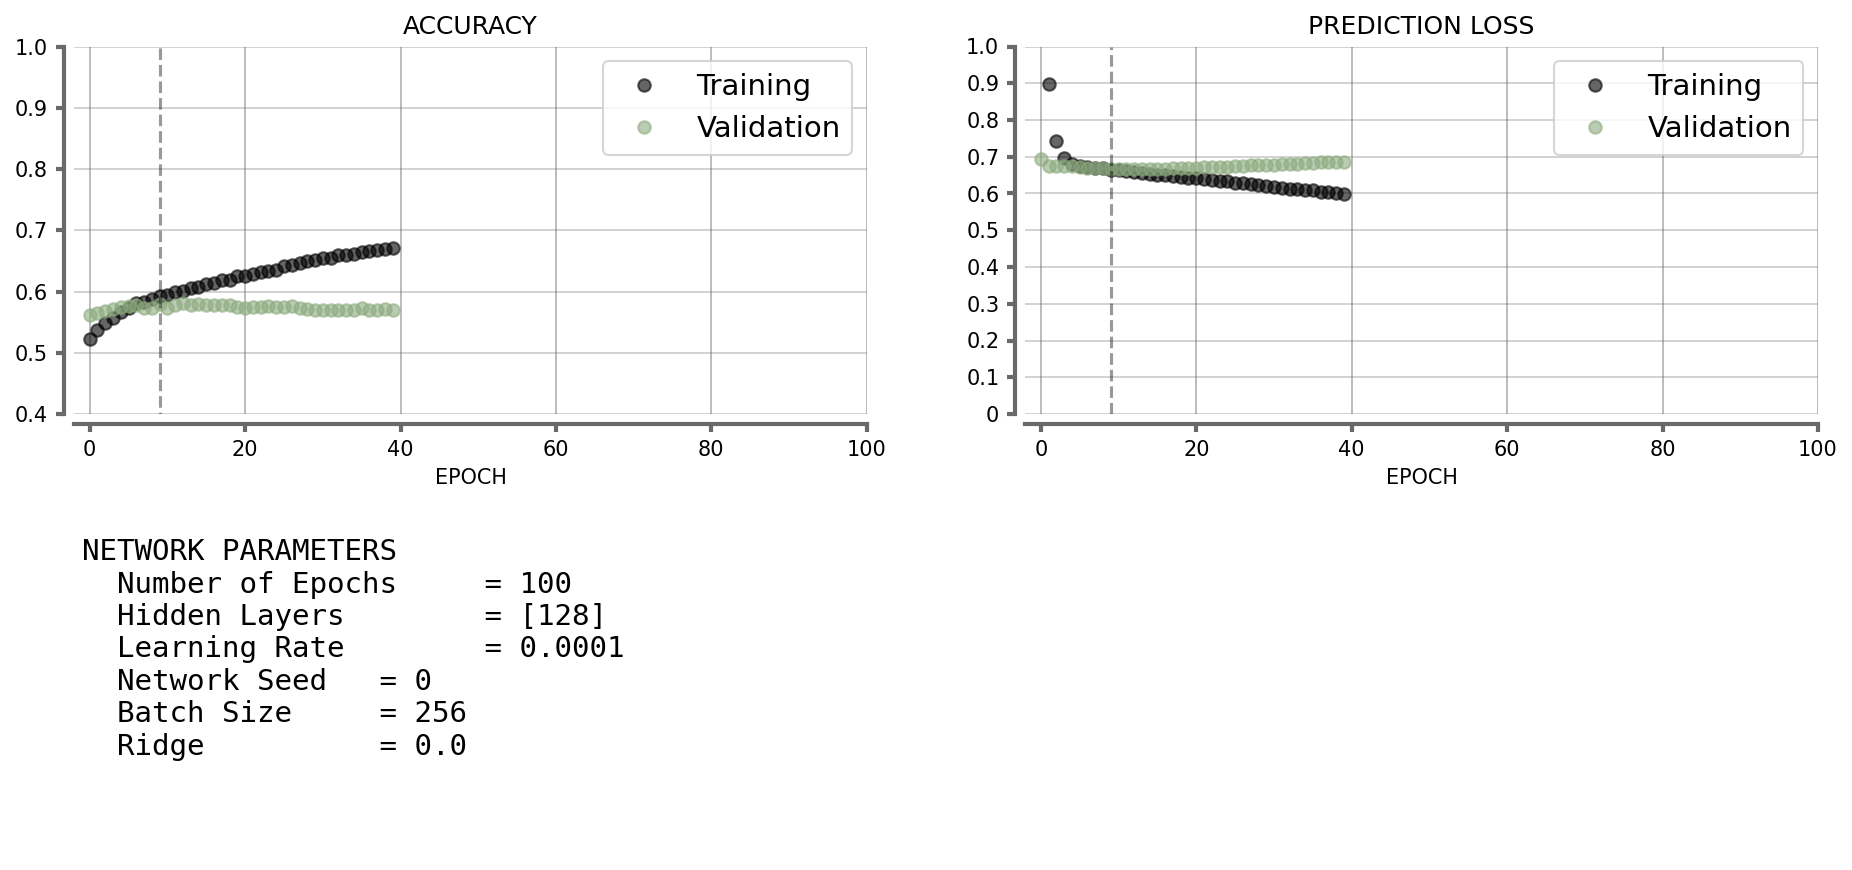

Elapsed time during fit = 1.01 minutes

Elapsed time during fit = 0.90 minutes

Elapsed time during fit = 0.87 minutes

Elapsed time during fit = 0.86 minutes

Elapsed time during fit = 0.92 minutes

Elapsed time during fit = 0.88 minutes

Elapsed time during fit = 0.94 minutes

Elapsed time during fit = 0.90 minutes

Elapsed time during fit = 0.88 minutes

Training Members: ['0251', '0261', '0271', '0281', '0291', '0301', '0101', '0111', '0121']
Validation Member: 0131
Testing Member: 0241
files do not exist - loading data & saving
Elapsed time during fit = 0.89 minutes



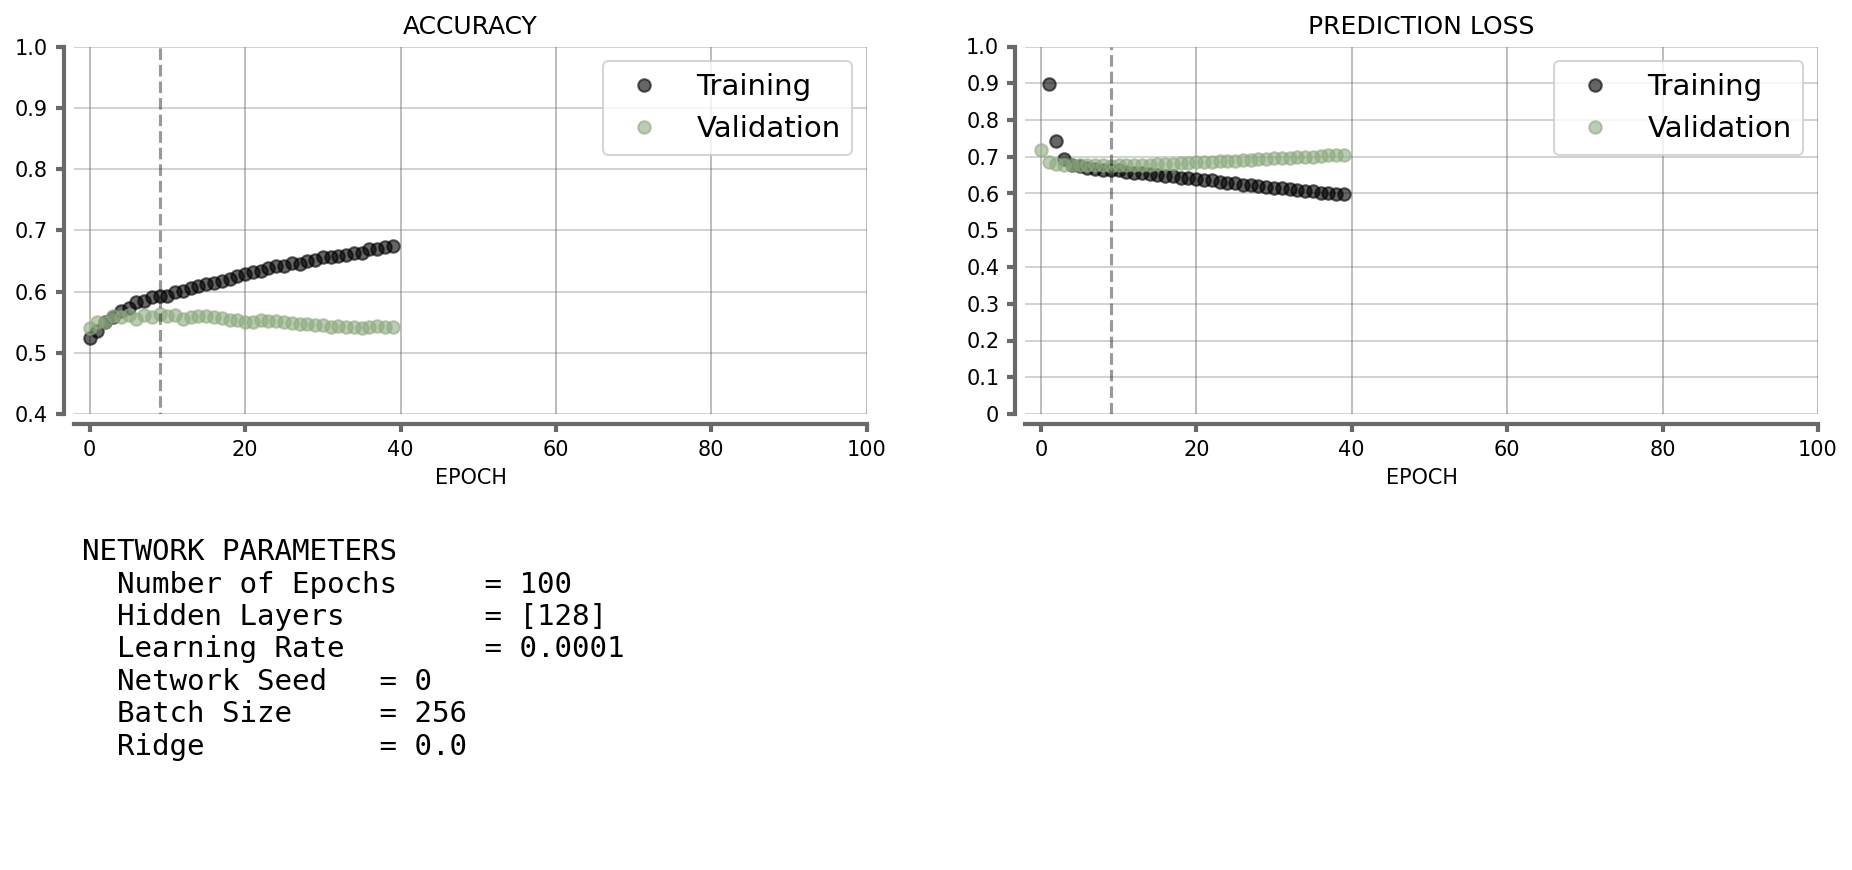

Elapsed time during fit = 0.84 minutes

Elapsed time during fit = 0.82 minutes

Elapsed time during fit = 0.86 minutes

Elapsed time during fit = 0.81 minutes

Elapsed time during fit = 0.81 minutes

Elapsed time during fit = 0.81 minutes

Elapsed time during fit = 0.86 minutes

Elapsed time during fit = 0.83 minutes

Elapsed time during fit = 0.82 minutes

Training Members: ['0261', '0271', '0281', '0291', '0301', '0101', '0111', '0121', '0131']
Validation Member: 0141
Testing Member: 0251
files do not exist - loading data & saving
Elapsed time during fit = 0.77 minutes



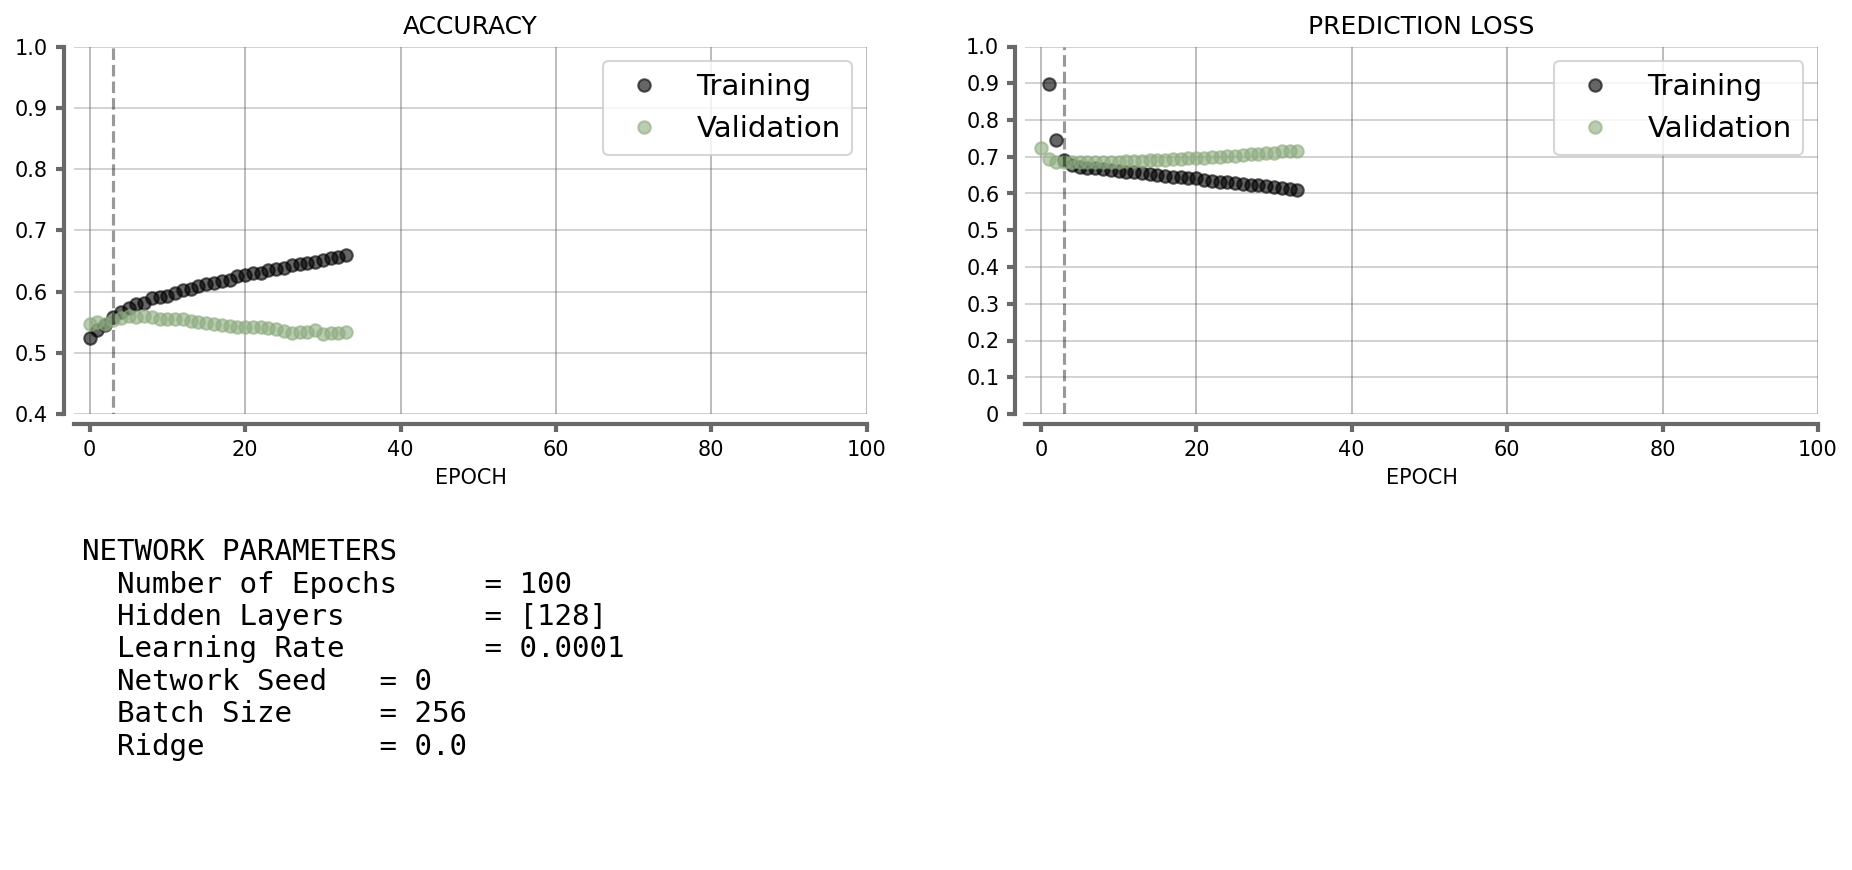

Elapsed time during fit = 0.79 minutes

Elapsed time during fit = 0.79 minutes

Elapsed time during fit = 0.79 minutes

Elapsed time during fit = 0.77 minutes

Elapsed time during fit = 0.79 minutes

Elapsed time during fit = 0.77 minutes

Elapsed time during fit = 0.76 minutes

Elapsed time during fit = 0.89 minutes

Elapsed time during fit = 0.80 minutes

Training Members: ['0271', '0281', '0291', '0301', '0101', '0111', '0121', '0131', '0141']
Validation Member: 0151
Testing Member: 0261
files do not exist - loading data & saving
Elapsed time during fit = 0.81 minutes



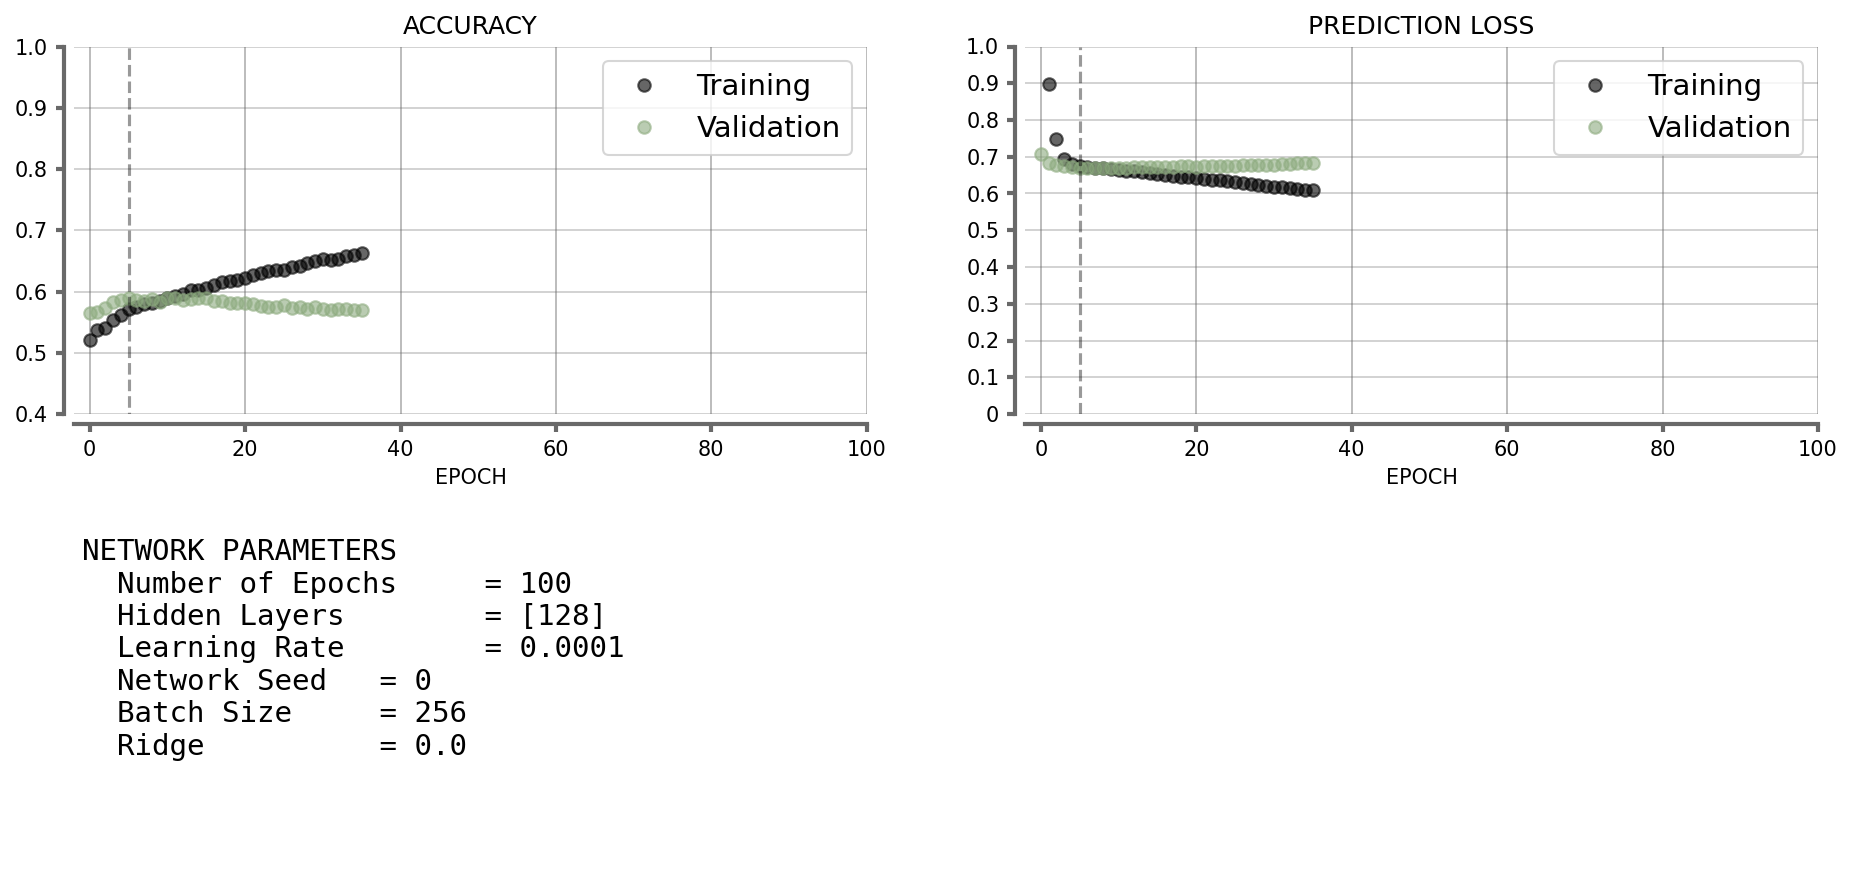

Elapsed time during fit = 0.85 minutes

Elapsed time during fit = 0.90 minutes

Elapsed time during fit = 0.87 minutes

Elapsed time during fit = 0.88 minutes

Elapsed time during fit = 0.89 minutes

Elapsed time during fit = 0.91 minutes

Elapsed time during fit = 0.88 minutes

Elapsed time during fit = 0.90 minutes

Elapsed time during fit = 0.86 minutes

Training Members: ['0281', '0291', '0301', '0101', '0111', '0121', '0131', '0141', '0151']
Validation Member: 0161
Testing Member: 0271
files do not exist - loading data & saving
Elapsed time during fit = 0.91 minutes



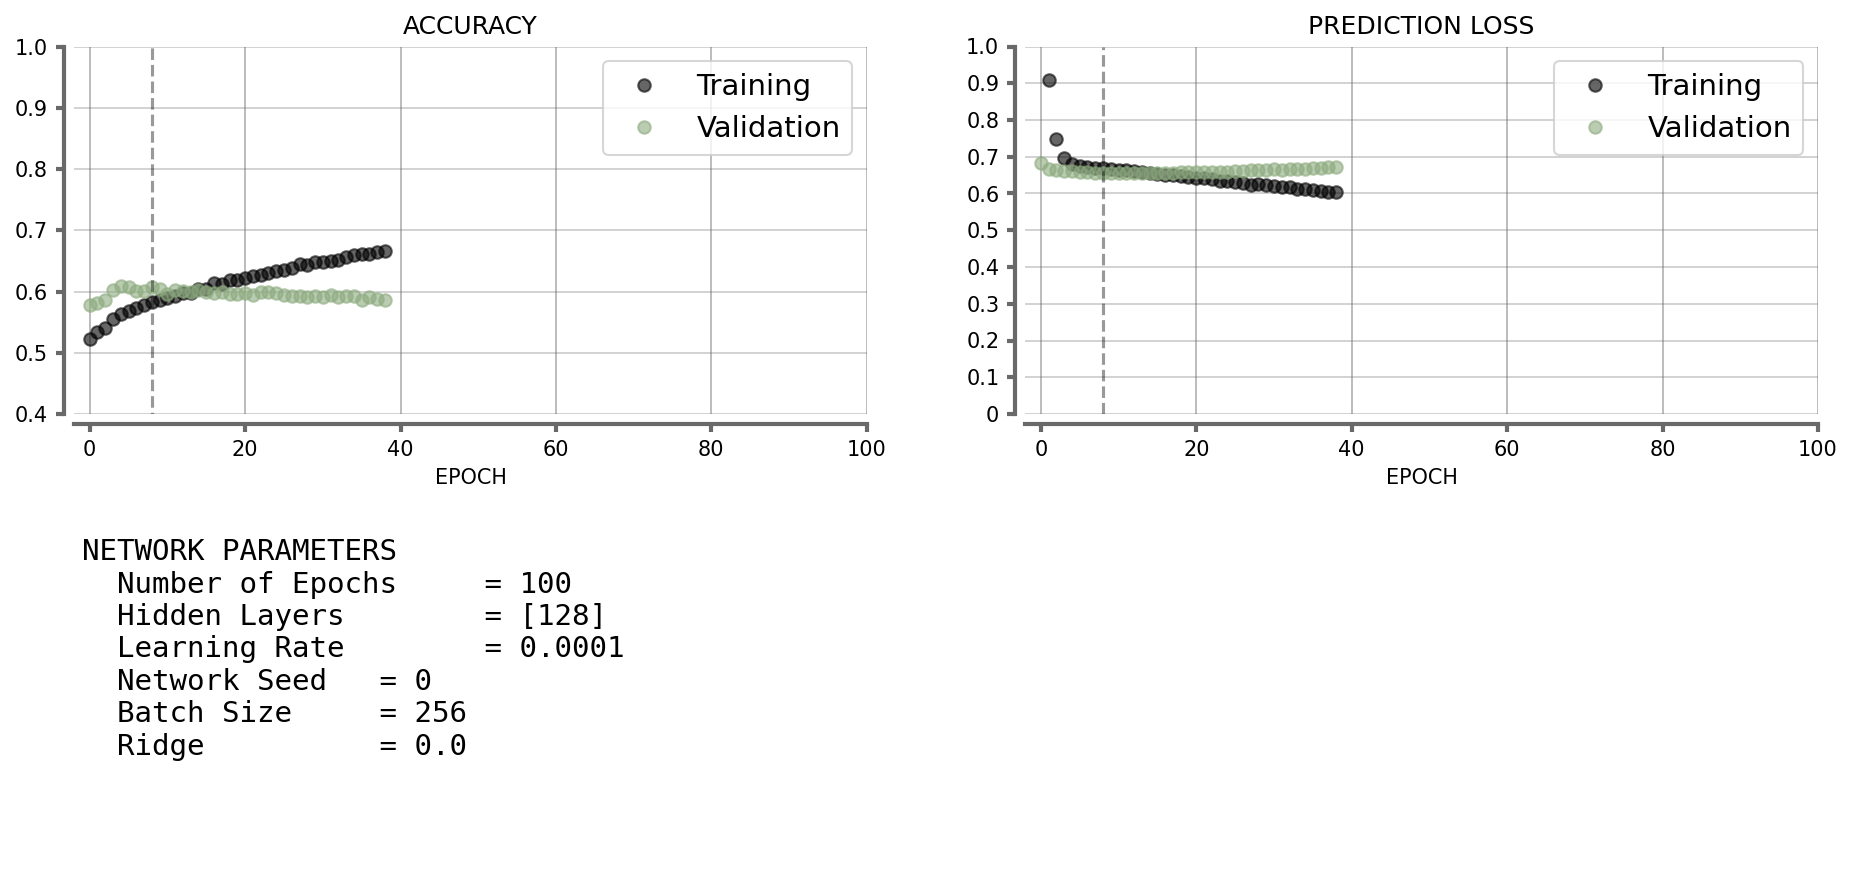

Elapsed time during fit = 0.88 minutes

Elapsed time during fit = 0.99 minutes

Elapsed time during fit = 0.99 minutes

Elapsed time during fit = 0.98 minutes

Elapsed time during fit = 0.95 minutes

Elapsed time during fit = 0.96 minutes

Elapsed time during fit = 0.97 minutes

Elapsed time during fit = 0.95 minutes

Elapsed time during fit = 0.94 minutes

Training Members: ['0291', '0301', '0101', '0111', '0121', '0131', '0141', '0151', '0161']
Validation Member: 0171
Testing Member: 0281
files do not exist - loading data & saving
Elapsed time during fit = 0.87 minutes



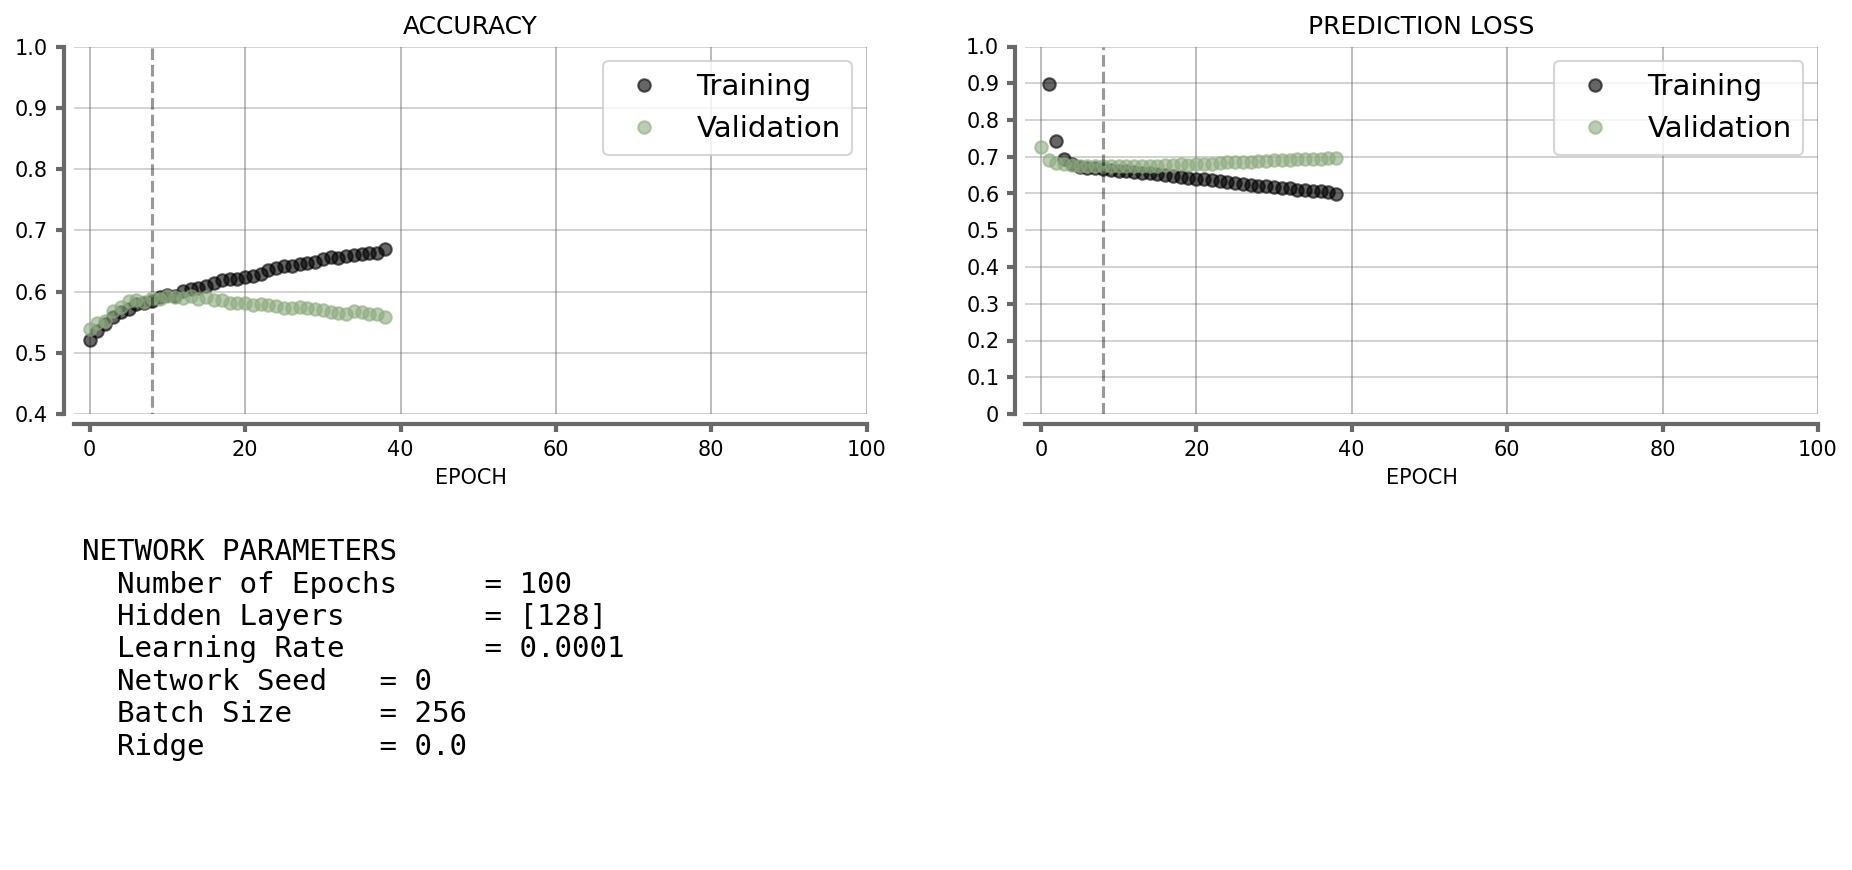

Elapsed time during fit = 0.80 minutes

Elapsed time during fit = 0.84 minutes

Elapsed time during fit = 0.87 minutes

Elapsed time during fit = 0.83 minutes

Elapsed time during fit = 0.83 minutes

Elapsed time during fit = 0.84 minutes

Elapsed time during fit = 0.86 minutes

Elapsed time during fit = 0.87 minutes

Elapsed time during fit = 0.93 minutes

Training Members: ['0301', '0101', '0111', '0121', '0131', '0141', '0151', '0161', '0171']
Validation Member: 0181
Testing Member: 0291
files do not exist - loading data & saving
Elapsed time during fit = 0.86 minutes



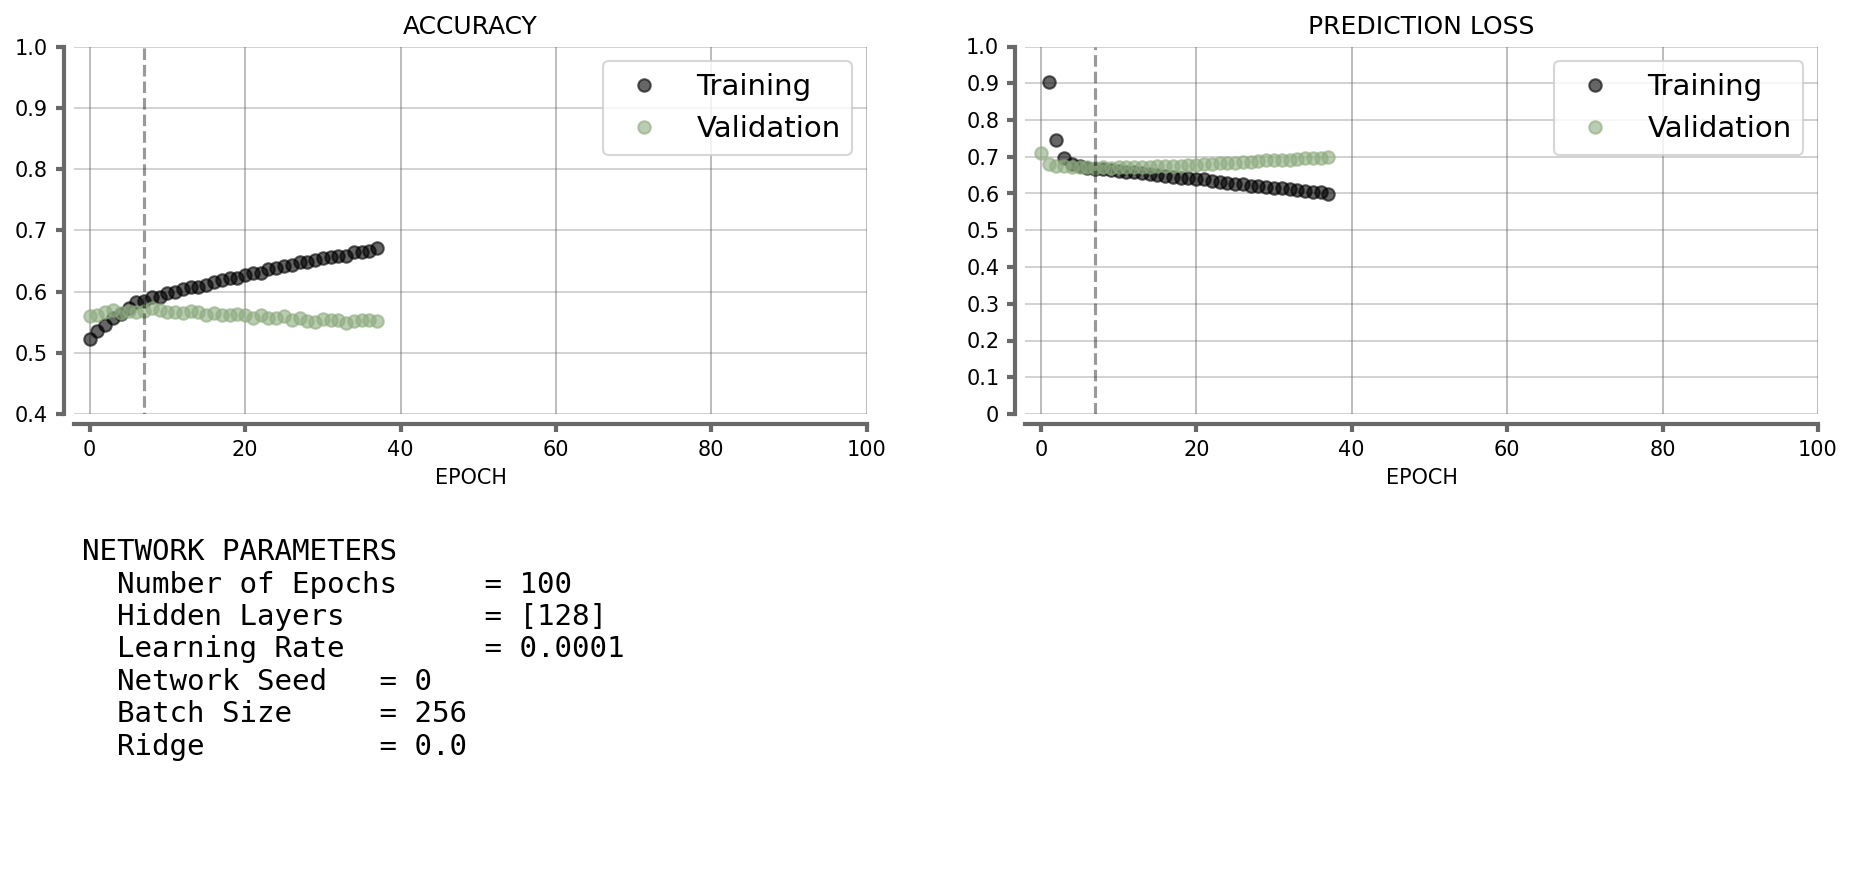

Elapsed time during fit = 0.82 minutes

Elapsed time during fit = 0.88 minutes

Elapsed time during fit = 0.86 minutes

Elapsed time during fit = 0.83 minutes

Elapsed time during fit = 0.85 minutes

Elapsed time during fit = 0.77 minutes

Elapsed time during fit = 0.81 minutes

Elapsed time during fit = 0.89 minutes

Elapsed time during fit = 0.87 minutes



In [4]:
#----- SET UP & TRAIN NN -----
EXP_NAME = 'exp2_kfold'
hps = get_hp(EXP_NAME)

NLABEL = 2
N_EPOCHS = 1000

HIDDENS = hps['HIDDENS']
BATCH_SIZE = hps['BATCH_SIZE']
LR_INIT = hps['LR_INIT']
RIDGE = hps['RIDGE']
dropout_rate = hps['DROPOUT_RATE']
PATIENCE = hps['PATIENCE']
GLOBAL_SEED = hps['GLOBAL_SEED']

print(HIDDENS,
      BATCH_SIZE,
      LR_INIT,
      RIDGE,
      dropout_rate,
      PATIENCE)

np.random.seed(GLOBAL_SEED)
random.seed(GLOBAL_SEED)
tf.random.set_seed(GLOBAL_SEED)


for kk in range(20):
        
    print('Training Members: '+str(hps['train_mems'][kk]))
    print('Validation Member: '+str(hps['val_mems'][kk][0]))
    print('Testing Member: '+str(hps['test_mems'][kk][0]))
    
    Xtrain, Xval, _, Ytrain, Yval, _, _ = split_SDbias(trainmems = hps['train_mems'][kk],
                                                            valmem = hps['val_mems'][kk][0],
                                                            testmem = hps['test_mems'][kk][0],
                                                            months = [11,12,1,2], # months for X (Y+leadtime are accounted for in function)
                                                            lead = hps['LEAD'])
    
    Xval = Xval.reshape((Xval.shape[0],Xval.shape[1]*Xval.shape[2]))
    Xtrain = Xtrain.reshape((Xtrain.shape[0],Xtrain.shape[1]*Xtrain.shape[2]))
    input_shape = Xtrain.shape[1]

    for SEED in range(10):
        tf.keras.backend.clear_session() 
        # ------ define NN ------
        ann = create_ann(input_shape = input_shape,
                         n_output = 2,
                         hiddens=HIDDENS,
                         RIDGE = RIDGE,
                         dropout = True, dropout_rate = dropout_rate)
    
        # ------ Training Hyperparameters ------
        optimizer = tf.optimizers.Adam(learning_rate = LR_INIT,)
        loss_func = tf.keras.losses.SparseCategoricalCrossentropy()
        metrics = [tf.keras.metrics.SparseCategoricalAccuracy(name="sparse_categorical_accuracy", dtype=None)]                             
    
        # ------ Compile Model -----
        ann.compile(optimizer = optimizer,
                    loss = loss_func,
                    metrics = metrics)
    
        # ----- Callbacks -----
        ES = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', mode = 'auto', min_delta = 0.001,
                                              patience = PATIENCE, verbose = 0, restore_best_weights = True)
        # LR = tf.keras.callbacks.LearningRateScheduler(scheduler,verbose=0)
    
        # ------ Train -----
        start_time = time.time()
        history = ann.fit(Xtrain,Ytrain,
                          validation_data = [Xval,Yval],
                          batch_size = BATCH_SIZE,
                          epochs = N_EPOCHS,
                          shuffle = True,
                          verbose = 0,
                          callbacks = [ES])
        stop_time = time.time()
        tf.print(f"Elapsed time during fit = {(stop_time - start_time)/60.:.2f} minutes\n")
        
        #----- PLOT THE RESULTS -----
        if SEED == 0:
            plot_results(
                history,
                exp_info=(100, HIDDENS, LR_INIT, BATCH_SIZE, SEED, PATIENCE, RIDGE),
                showplot=True
            ) 
    
        annfi_name = 'ann_60Eshift_'+EXP_NAME+'.'+str(kk)+'_seed'+str(SEED)+'.h5'
        ann.save(base_dir+'train/saved_models/kfold/'+annfi_name)